# Analyse des données d'économie, emploi et éducation avec l'API OCDE

**L'objectif de ce notebook est de réaliser une analyse intégrée des données sur l'économie, l'emploi et l'éducation de l'année 2021 dans 38 pays de l'OCDE et celle de Brésil , chargé depuis l'API de l'OCDE (Organisation de Coopération et de Développement Économiques). Nous allons procéder en plusieurs étapes pour nettoyer les données de chaque domaine et les fusionner ensuite pour obtenir un jeu de données commun et ainsi les anlayser avec différents méthodes de l'analyse de donnée.**

# 1. Chargement des données de l'api OCDE :


**Pour accéder aux données depuis l'API OCDE, nous utiliserons la bibliothèque pandas et des requêtes HTTP via requests.**

In [ ]:
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

In [ ]:
# URLs des ensembles de données
education_url = "https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_NF_DIST_FIELD,1.0/BEL+DEU+CHE+ESP+AUS+TUR+SWE+MEX+JPN+IRL+FRA+FIN+DNK+ITA+COL.ISCED11_45+ISCED11_35+ISCED11_746_756_766+ISCED11_5T8+ISCED11_5+ISCED11_6+ISCED11_7+ISCED11_8....F05T07+F00+F01+F02+F03+F04+F05+F06+F07+F08+F09+F10..A....NMOB+MOB..F+M.?startPeriod=2015&endPeriod=2022&dimensionAtObservation=AllDimensions"
emploi_url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_ALFS@DF_ALFS_EMP,1.1/DEU+AUS+AUT+BEL+CHL+CAN+COL+KOR+CRI+DNK+ESP+EST+USA+FIN+FRA+HUN+GRC+IRL+ISL+ITA+JPN+LVA+LTU+LUX+MEX+NOR+NZL+NLD+POL+SVK+PRT+GBR+SVN+SWE+CHE+CZE+TUR+BRA.EMP.PS.N.M+F.Y_GE15._T+ICSE93_5+ICSE93_2T3+ICSE93_1.U+T+S+R+Q+P+O+N+M+L+K+J+I+H+G+GTU+F+E+D+C+B+BTF+A+_T.A?startPeriod=2021&endPeriod=2021&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
data_VAB_url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.NAD,DSD_NAMAIN10@DF_TABLE1_OUTPUT,2.0/A.HRV+SAU+CZE+TUR+CHE+SWE+MEX+JPN+ITA+IRL+FRA+FIN+ESP+DNK+COL+BEL+DEU+AUS...B1G+B1GQ..A+C+BTE+F+GTI+J+K+OTQ+M_N+L+RTU+_T..USD_EXC.V..?startPeriod=2015&endPeriod=2022&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
data_IDE_url='https://sdmx.oecd.org/public/rest/data/OECD.DAF.INV,DSD_FDI@DF_FDI_FLOW_IND,1.0/DEU+AUS+AUT+BEL+CAN+CHL+COL+KOR+CRI+DNK+ESP+EST+USA+FIN+FRA+GRC+HUN+IRL+ISL+JPN+LVA+LTU+LUX+MEX+NOR+NZL+NLD+POL+PRT+SVK+GBR+SVN+SWE+CHE+CZE+TUR+ITA.T_FA_F.USD_EXC.DI+DO.NET_FDI.ALL...W.IMC._T+ATUXFPRV+C26+C13T18X15+G45+G46+G47+H49+H50+H51+H52+HX53+H53+J58_62_63+J59_60+J61+K641+K642+K643+K64+K65+K66+M691+M692+M701+M702+M731+M732+M69+M70+M71+M72+M73+M74_75+N79+N77+N78T82+R90+R91+R92_93+S94+S95_96+A_B+_X+E37T39+E36+C30+C303+C29+C28+C263_264+C265_266+C262+C24_25+C22+C21+C20+C19+C16T18+C13_14+C10T12+B06_09+A+B+C+C19T22+C24T28X27+C29_30+C15_23_27_31T33+D+E+F+GTU+G+H+I+J+K+L+M+N+O_T_U+P+Q+R+S+PRV_RE.A.?startPeriod=2021&endPeriod=2021&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
taux_chomage_url='https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP_FIELD,1.0/SWE+IRL+LUX+AUS+AUT+BEL+CHL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+ITA+LVA+LTU+MEX+NLD+NOR+POL+PRT+SVK+SVN+ESP+CHE+TUR+GBR+USA.F+M.Y55T64+Y45T54+Y35T44+Y25T34.ISCED11A_7_8+ISCED11A_6+ISCED11A_5+ISCED11A_5T8.F00_08_10+F05T07+F022T03+F02_03+F01+F02+F03+F04+F05+F06+F07+F08+F09+F10.........OBS...A3?startPeriod=2021&endPeriod=2021&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
taux_emploi_url='https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_FIELD,1.0/SWE+IRL+LUX+AUS+AUT+BEL+CHL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+ITA+LVA+LTU+MEX+NLD+NOR+POL+PRT+SVK+SVN+ESP+CHE+TUR+GBR+USA.F+M.Y25T64.ISCED11A_7_8+ISCED11A_5+ISCED11A_6.F01+F02+F03+F04+F05+F06+F07+F08+F09+F10.........OBS...A3?startPeriod=2021&endPeriod=2021&lastNObservations=1&dimensionAtObservation=AllDimensions'
diffRevenue_url='https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_LSO_EA@DF_LSO_EARN_REL_MALE,1.0/LUX+IRL+AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ITA+JPN+KOR+LVA+LTU+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+CHE+TUR+GBR+USA+OECD+ARG+BRA+BGR+PER+ROU..Y25T64.ISCED11A_0T2+ISCED11A_3_4+ISCED11A_5T8.......EMP...OBS.FT..A?startPeriod=2021&endPeriod=2021&lastNObservations=1&dimensionAtObservation=AllDimensions'
# Liste des URLs avec leurs noms de fichier correspondants
urls = [
    {"url": education_url, "filename": "data_education.csv"},
    {"url": emploi_url, "filename": "data_emploi.csv"},
    {"url": data_VAB_url, "filename": "VAB.csv"},
    {"url": data_IDE_url, "filename": "IDE.csv"},
    {"url": taux_chomage_url, "filename": "Taux_Chomage.csv"},
    {"url": diffRevenue_url, "filename": "diffRevenue.csv"},
    {"url": taux_emploi_url, "filename": "taux_emploi.csv"}
]

# En-têtes de la requête
headers = {
    'Accept': 'application/vnd.sdmx.data+csv; charset=utf-8'
}

# Fonction pour télécharger et sauvegarder les données
def download_data(url, filename):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        with open(filename, 'w', encoding='utf-8') as file:
            file.write(response.text)
        print(f"Le fichier '{filename}' a été téléchargé avec succès.")
    else:
        print(f"Erreur {response.status_code} lors du téléchargement de {filename}")

# Boucle pour télécharger chaque jeu de données
for item in urls:
    download_data(item["url"], item["filename"])


Le fichier 'data_education.csv' a été téléchargé avec succès.
Le fichier 'data_emploi.csv' a été téléchargé avec succès.
Le fichier 'VAB.csv' a été téléchargé avec succès.
Le fichier 'IDE.csv' a été téléchargé avec succès.
Le fichier 'Taux_Chomage.csv' a été téléchargé avec succès.
Le fichier 'diffRevenue.csv' a été téléchargé avec succès.
Le fichier 'taux_emploi.csv' a été téléchargé avec succès.


# **2. Nettoyage des données :**
## 2.1. les données de l'éducation

*   Cet dataset fournit des informations détaillées sur les étudiants dans l'enseignement supérieur
*   Les diplômés pour chaque domaine d'études et niveau d'étude.
*   Le pourcentage de dépense pour le meme domaine et niveau d'étude pour chaque pays .



In [ ]:
#afficher les donnée avant nettoyage
edu = pd.read_csv("/content/drive/MyDrive/educa2021.csv")
edu.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Zone de référence,EDUCATION_LEV,Niveau d'éducation,MEASURE,Mesure,...,CONF_STATUS,Statut de confidentialité,COMMENT_OBS,Commentaire d'observation,DECIMALS,Décimales,TIME_PER_COLLECT,Collection de périodes de temps,UNIT_MULT,Multiplicateur d'unité
0,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...,"Répartition des élèves inscrits, des nouveaux ...",I,JPN,Japon,ISCED11_7,Niveau master ou équivalent,GRAD,Diplômés,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,0,NaN
1,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...,"Répartition des élèves inscrits, des nouveaux ...",I,KOR,Corée,ISCED11_6,Niveau licence ou équivalent,GRAD,Diplômés,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,0,NaN
2,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...,"Répartition des élèves inscrits, des nouveaux ...",I,JPN,Japon,ISCED11_7,Niveau master ou équivalent,GRAD,Diplômés,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,0,NaN
3,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...,"Répartition des élèves inscrits, des nouveaux ...",I,JPN,Japon,ISCED11_8,Niveau doctorat ou équivalent,GRAD,Diplômés,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,0,NaN
4,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...,"Répartition des élèves inscrits, des nouveaux ...",I,GRC,Grèce,ISCED11_8,Niveau doctorat ou équivalent,GRAD,Diplômés,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,0,NaN


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Suppression des colonnes non pertinentes ou redondantes :**

In [ ]:
edu = edu.drop(columns=[
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
     'EDUCATION_LEV', 'MEASURE',
    'Mesure', 'EDUCATION_TYPE', 'Type d\'éducation', 'INTENSITY',
  'Intensité', 'EDUCATION_FIELD',  'GRADE', 'Classe',
    'FREQ', 'Fréquence d\'observation', 'ORIGIN', 'Origine', 'DESTINATION',
    'Unnamed: 23', 'INST_TYPE_EDU', 'Type d\'établissement d\'enseignement',
    'MOBILITY', 'Mobilité', 'UNIT_MEASURE', 'Unité de mesure',
    'Sexe', 'AGE', 'Âge', 'Période de temps',
    'Valeur d\'observation', 'REF_YEAR_AGES',
    'Date de référence pour les âges', 'ORIGIN_CRITERION',
    'Critère d\'origine', 'REPYEARSTART', 'Année de référence début',
    'REPYEAREND', 'Année de référence fin',
    'Statut d\'observation', 'CONF_STATUS', 'Statut de confidentialité',
    'COMMENT_OBS', 'Commentaire d\'observation', 'DECIMALS', 'Décimales',
    'TIME_PER_COLLECT', 'Collection de périodes de temps','TIME_PERIOD', 'UNIT_MULT',
    'Multiplicateur d\'unité','OBS_STATUS'
])
edu.columns
# Afficher les premières lignes du DataFrame après suppression des colonnes
edu.head()


,Zone de référence,Niveau d'éducation,Domaines d’études,SEX,OBS_VALUE
0,Japon,Niveau master ou équivalent,"Commerce, administration et droit",F,NaN
1,Corée,Niveau licence ou équivalent,"Ingénierie, industries de transformation et co...",M,16.444929
2,Japon,Niveau master ou équivalent,Programmes et certifications génériques,M,NaN
3,Japon,Niveau doctorat ou équivalent,Santé et protection sociale,F,NaN
4,Grèce,Niveau doctorat ou équivalent,"Sciences sociales, journalisme et information",M,0.000000


**Suppression des valeurs manquantes, les doublons et renommage des colonnes : :**

In [ ]:
# Vérifier les colonnes numériques
numerical_columns = edu.select_dtypes(include=['number']).columns

# Remplacer les valeurs nulles uniquement dans les colonnes numériques par la moyenne
edu[numerical_columns] = edu[numerical_columns].fillna(edu[numerical_columns].mean())

# Supprimer les doublons
edu = edu.drop_duplicates()

# Renommer les colonnes
edu = edu.rename(columns={
    'SEX': 'Genre',
    'Zone de référence': 'Pays',
    'OBS_VALUE': 'Pourcentage depenses',
    'Domaine d\'études': 'Domain etude',
    'TIME_PERIOD': 'Annee'
})

# Afficher les premières lignes du DataFrame
edu.head()


,Pays,Niveau d'éducation,Domaines d’études,Genre,Pourcentage depenses
0,Japon,Niveau master ou équivalent,"Commerce, administration et droit",F,17.791047
1,Corée,Niveau licence ou équivalent,"Ingénierie, industries de transformation et co...",M,16.444929
2,Japon,Niveau master ou équivalent,Programmes et certifications génériques,M,17.791047
3,Japon,Niveau doctorat ou équivalent,Santé et protection sociale,F,17.791047
4,Grèce,Niveau doctorat ou équivalent,"Sciences sociales, journalisme et information",M,0.000000


In [ ]:
# Sauvegarder les données nettoyées dans un fichier CSV
edu.to_csv('education_cleaned.csv', index=False)

## 2.1. les données de l'économie :

##     2.1.1. VAB dataset (Valeur ajoutée brute) :

- Ce dataset permet d'évaluer la contribution de chaque secteur ou activité à l'économie globale, pour l'année 2021.
- La VAB correspond à la différence entre la production totale d'un secteur (ou d'une entreprise) et la valeur des consommations intermédiaires utilisées pour produire cette production.
- La valeur de VAB est en Millions USD.

In [ ]:
#afficher les donnée avant nettoyage
df = pd.read_csv('VAB.csv')
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Fréquence d'observation,REF_AREA,Zone de référence,SECTOR,Secteur institutionnel,...,CONF_STATUS,Statut de confidentialité,DECIMALS,Décimales,OBS_STATUS,Statut d'observation,UNIT_MULT,Multiplicateur d'unité,CURRENCY,Monnaie
0,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0),PIB annuel et ses composantes selon l'approche...,I,A,Annuelle,CHL,Chili,S1,Economie totale,...,F,Libre (libre pour publication),1,NaN,A,NaN,6,NaN,_Z,N'est pas applicable
1,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0),PIB annuel et ses composantes selon l'approche...,I,A,Annuelle,TUR,Türkiye,S1,Economie totale,...,F,Libre (libre pour publication),1,NaN,A,NaN,6,NaN,_Z,N'est pas applicable
2,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0),PIB annuel et ses composantes selon l'approche...,I,A,Annuelle,GRC,Grèce,S1,Economie totale,...,F,Libre (libre pour publication),1,NaN,A,NaN,6,NaN,_Z,N'est pas applicable
3,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0),PIB annuel et ses composantes selon l'approche...,I,A,Annuelle,POL,Pologne,S1,Economie totale,...,F,Libre (libre pour publication),1,NaN,A,NaN,6,NaN,_Z,N'est pas applicable
4,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0),PIB annuel et ses composantes selon l'approche...,I,A,Annuelle,GRC,Grèce,S1,Economie totale,...,F,Libre (libre pour publication),1,NaN,A,NaN,6,NaN,_Z,N'est pas applicable



**Suppression des colonnes inutiles :**



In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
    "Fréquence d'observation", 'SECTOR', 'Secteur institutionnel',
    'COUNTERPART_SECTOR', 'Secteur institutionnel de contrepartie',
    'Instruments financiers et actifs non financiers', 'INSTR_ASSET', 'Transaction',
    'Price base', 'TRANSFORMATION', 'PRICE_BASE', 'Type de prix', 'REF_AREA', 'EXPENDITURE',
    'Transformation', 'TABLE_IDENTIFIER', 'ACTIVITY', 'Identifiant de tableau', 'Time period',
    'REF_YEAR_PRICE', "Valeur d'observation", 'Price reference year', 'Statut de confidentialité',
    'CONF_STATUS', 'DECIMALS', 'Décimales', 'OBS_STATUS', 'Statut d\'observation', 'UNIT_MULT',
    'Multiplicateur d\'unité', 'Monnaie', 'CURRENCY', 'Dépense', 'UNIT_MEASURE', 'Unité de mesure'
    ,'Prix ​​année de référence','Période temporelle','TRANSACTION','TIME_PERIOD'
]

# Supprimer les colonnes inutiles
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoyé
df_cleaned.to_csv('VAB_nettoyé.csv', index=False)


In [ ]:
df_cleaned = pd.read_csv('VAB_nettoyé.csv')

df_cleaned.head()


,Zone de référence,Activité économique,OBS_VALUE
0,Chili,Information et communication,8019.773
1,Türkiye,Information et communication,22928.571
2,Grèce,Total - ensemble des activités,190439.435
3,Pologne,"Agriculture, sylviculture et pêche",15475.476
4,Grèce,Industrie (sauf construction),28667.351


**Vérification des valeurs manquantes et renommage des colonnes :**

In [ ]:
print(df_cleaned.isnull().sum())

Zone de référence      0
Activité économique    0
OBS_VALUE              0
dtype: int64


In [ ]:
# Renommer les colonnes
df_cleaned = df_cleaned.rename(columns={
    'Zone de référence': 'Pays',
    'TIME_PERIOD': 'annee',
    'Activité économique':'Activite economique',
    'OBS_VALUE': 'VAB'
})

# Afficher un aperçu des données avec les nouvelles colonnes
print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('VAB_nettoyé_renommé.csv', index=False)


      Pays                 Activite economique         VAB
0    Chili        Information et communication    8019.773
1  Türkiye        Information et communication   22928.571
2    Grèce      Total - ensemble des activités  190439.435
3  Pologne  Agriculture, sylviculture et pêche   15475.476
4    Grèce       Industrie (sauf construction)   28667.351


##     2.1.2. IDE dataset (Investissements directs étrangers) :

Ce dataset porte sur les flux d'investissements directs étrangers (IDE), ventilés par activité économique, zone de référence
- Les données sont exprimées en en millions dollars américains (USD).
- Fréquence d'observation : Données observées annuellement.
- Le principe de mesure peut etre soit : **DO :** Flux d'IDE entrant et sortant
    ou bien **DI :** Flux d'IDE entrant


In [ ]:
df = pd.read_csv('IDE.csv')
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Zone de référence,MEASURE,Mesure,UNIT_MEASURE,Unité de mesure,...,OBS_STATUS,Statut de l'observation,UNIT_MULT,Multiplicateur d'unité,CONF_STATUS,Statut de confidentialité,CURRENCY,Monnaie,DECIMALS,Décimales
0,DATAFLOW,OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0),"Flux d'IDE par activité économique, BMD4",I,AUT,Autriche,T_FA_F,Flux financiers d'IDI - total,USD_EXC,"Dollars des É-U, taux de change converti",...,A,NaN,6,NaN,N,NaN,USD,Dollars des États-Unis,2,NaN
1,DATAFLOW,OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0),"Flux d'IDE par activité économique, BMD4",I,IRL,Irlande,T_FA_F,Flux financiers d'IDI - total,USD_EXC,"Dollars des É-U, taux de change converti",...,A,NaN,6,NaN,C,NaN,USD,Dollars des États-Unis,2,NaN
2,DATAFLOW,OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0),"Flux d'IDE par activité économique, BMD4",I,CHE,Suisse,T_FA_F,Flux financiers d'IDI - total,USD_EXC,"Dollars des É-U, taux de change converti",...,A,NaN,6,NaN,C,NaN,USD,Dollars des États-Unis,2,NaN
3,DATAFLOW,OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0),"Flux d'IDE par activité économique, BMD4",I,PRT,Portugal,T_FA_F,Flux financiers d'IDI - total,USD_EXC,"Dollars des É-U, taux de change converti",...,A,NaN,6,NaN,N,NaN,USD,Dollars des États-Unis,2,NaN
4,DATAFLOW,OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0),"Flux d'IDE par activité économique, BMD4",I,BEL,Belgique,T_FA_F,Flux financiers d'IDI - total,USD_EXC,"Dollars des É-U, taux de change converti",...,A,NaN,6,NaN,C,NaN,USD,Dollars des États-Unis,2,NaN



**Suppression des colonnes inutiles :**



In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'MEASURE',
    'Mesure', 'UNIT_MEASURE', 'Unité de mesure', 'ACCOUNTING_ENTRY', 'Ecriture comptable',
    'TYPE_ENTITY', 'Type d\'entité', 'FDI_COMP', 'Composant de l\'IDE', 'SECTOR',
    'Secteur institutionnel', 'COUNTERPART_AREA', 'Zone de contrepartie', 'LEVEL_COUNTERPART',
    'FREQ', 'ACTIVITY', 'Niveau de contrepartie', 'LEVEL_COUNTERPART', 'Fréquence d\'observation',
    'FDI_COLLECTION_ID', 'Identifiant de collecte des IDE', 'TIME_PERIOD', 'Période temporelle',
    'OBS_STATUS', 'Valeur de l\'observation', 'OBS_STATUS', 'UNIT_MULT', 'Statut de l\'observation',
    'Multiplicateur d\'unité', 'CONF_STATUS', 'Statut de confidentialité', 'CURRENCY', 'Monnaie',
    'Décimales', 'DECIMALS', 'CHAPTER', 'Chapitre', 'Valeur d\'observation', 'Ajustement',
    'COUNTERPART_SECTOR', 'Secteur institutionnel de contrepartie', 'CONSOLIDATION', 'ADJUSTMENT',
    'Secteur institutionnel de contrepartie', 'Statut de consolidation', 'TRANSACTION',
    'INSTR_ASSET', 'PRODUCT', 'Échéance initiale et résiduelle', 'MATURITY', 'Instruments et actifs',
    'Produit', 'PENSION_FUNDTYPE', 'Type de fond de pension', 'CURRENCY_DENOM',
    'Statut d\'observation', 'Période de base', 'BASE_PER', 'Prix ​​année de référence',
    'REF_YEAR_PRICE', 'Identifiant de tableau', 'Transformation', 'TRANSFORMATION', 'Type de prix',
    'PRICE_BASE', 'Evaluation', 'EVALUATION', 'Monnaie de libellé', 'TABLE_IDENTIFIER', 'VALUATION','Principe de mesure'
]
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoyé
df_cleaned.to_csv('IDE_nettoyé.csv', index=False)
df_cleaned.head()

,Zone de référence,MEASURE_PRINCIPLE,Activité économique,OBS_VALUE
0,Autriche,DO,Activités de conseils en matière de gestion,NaN
1,Irlande,DO,Activités de location,NaN
2,Suisse,DO,Commerce de gros à l’exception des véhicules a...,NaN
3,Portugal,DI,Activités des sociétés de portefeuille,NaN
4,Belgique,DI,Télécommunications,NaN


**Renommage des colonnes :**


In [ ]:
df_cleaned = df_cleaned.rename(columns={
    'Zone de référence': 'Pays',
    'Activité économique': 'Activite economique',
    'OBS_VALUE': 'IDE',
    'MEASURE_PRINCIPLE' : 'Principe de mesure'
    #DO : Principe directionnel-sortant
    #DI : Principe directionnel-entrant
})

# Afficher un aperçu des données avec les nouvelles colonnes
print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('IDE_nettoyé_Renommé.csv', index=False)


       Pays Principe de mesure  \
0  Autriche                 DO   
1   Irlande                 DO   
2    Suisse                 DO   
3  Portugal                 DI   
4  Belgique                 DI   

                                 Activite economique  IDE  
0        Activités de conseils en matière de gestion  NaN  
1                              Activités de location  NaN  
2  Commerce de gros à l’exception des véhicules a...  NaN  
3             Activités des sociétés de portefeuille  NaN  
4                                 Télécommunications  NaN  


**Vérifier l'existence de valeurs nulles :**


In [ ]:
print("Résumé des valeurs nulles par colonne :")
print(df_cleaned.isnull().sum())

# Vérifier si le dataset contient des valeurs nulles
print("\nLe dataset contient-il des valeurs nulles ? :", df_cleaned.isnull().values.any())


Résumé des valeurs nulles par colonne :
Pays                      0
Principe de mesure        0
Activite economique       0
IDE                    1725
dtype: int64

Le dataset contient-il des valeurs nulles ? : True


**Suppression des lignes où 'IDE' est vide (NaN) :**

In [ ]:
df_cleaned1 = df_cleaned.dropna(subset=['IDE'])

# Vérifier le résultat
print("Dataset après suppression des lignes où 'IDE' est vide :")
print(df_cleaned1.head())

# Sauvegarder le dataset nettoyé
df_cleaned1.to_csv('IDE_final.csv', index=False)


Dataset après suppression des lignes où 'IDE' est vide :
                    Pays Principe de mesure  \
463               France                 DI   
465              Espagne                 DI   
466           Costa Rica                 DI   
467             Pays-Bas                 DO   
468  République slovaque                 DO   

                                   Activite economique          IDE  
463                       Information et communication  9258.514664  
465     Fabrication de machines et de matériel, n.c.a.   197.492904  
466                 Agriculture, sylviculture et pêche   -64.366890  
467  Fabrication de métaux de base et de produits m...  -314.569536  
468  Activités des agences de voyages, voyagistes, ...     0.000000  


## 2.3. les données de l'emploi

### 2.3.1 Employées dataset

**Le jeu de données "Emploi par activité et situation professionnelle (ALFS)" présente des statistiques annuelles sur la population active, ventilées par activités économiques et par statut professionnel. Ces données sont issues des membres de l'OCDE, du Brésil. Les mesures concernent les individus âgés de 15 ans et plus, exprimées en milliers de personnes.**

In [ ]:
# Charger le fichier CSV
file_path = 'emploi_data.csv'  # Remplacez par le chemin réel du fichier
data = pd.read_csv(file_path)
#afficher les donnée avant nettoyage
data.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Zone de référence,MEASURE,Mesure,UNIT_MEASURE,Unité de mesure,...,OBS_VALUE,Valeur d'observation,BASE_PER,Période de base,OBS_STATUS,Statut d'observation,UNIT_MULT,Multiplicateur d'unité,DECIMALS,Décimales
0,DATAFLOW,OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1),Emploi par activité et situation profesionnell...,I,SWE,Suède,EMP,Emploi,PS,Personnes,...,135.525,NaN,NaN,NaN,A,Normal value,3,Thousands,0,Zero
1,DATAFLOW,OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1),Emploi par activité et situation profesionnell...,I,NLD,Pays-Bas,EMP,Emploi,PS,Personnes,...,32.000,NaN,NaN,NaN,A,Normal value,3,Thousands,0,Zero
2,DATAFLOW,OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1),Emploi par activité et situation profesionnell...,I,BEL,Belgique,EMP,Emploi,PS,Personnes,...,157.425,NaN,NaN,NaN,A,Normal value,3,Thousands,0,Zero
3,DATAFLOW,OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1),Emploi par activité et situation profesionnell...,I,ESP,Espagne,EMP,Emploi,PS,Personnes,...,809.900,NaN,NaN,NaN,A,Normal value,3,Thousands,0,Zero
4,DATAFLOW,OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1),Emploi par activité et situation profesionnell...,I,ISL,Islande,EMP,Emploi,PS,Personnes,...,5.975,NaN,NaN,NaN,A,Normal value,3,Thousands,0,Zero


**Suppression des colonnes redandontes :**

In [ ]:
columns_to_remove = ['MEASURE', 'Sexe', 'AGE', 'FREQ', 'UNIT_MEASURE',
                     'TRANSFORMATION', 'WORKER_STATUS', 'OBS_STATUS',
                     'UNIT_MULT', 'DECIMALS']
data = data.drop(columns=columns_to_remove)

print("Colonnes redondantes supprimées.")
data.info()

Colonnes redondantes supprimées.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STRUCTURE                1284 non-null   object 
 1   STRUCTURE_ID             1284 non-null   object 
 2   STRUCTURE_NAME           1284 non-null   object 
 3   ACTION                   1284 non-null   object 
 4   REF_AREA                 1284 non-null   object 
 5   Zone de référence        1284 non-null   object 
 6   Mesure                   1284 non-null   object 
 7   Unité de mesure          1284 non-null   object 
 8   Transformation           1284 non-null   object 
 9   SEX                      1284 non-null   object 
 10  Âge                      1284 non-null   object 
 11  Statut des travailleurs  1284 non-null   object 
 12  ACTIVITY                 1284 non-null   object 
 13  Activité économique      1284 non-null   obje

**Suppression des colonnes unitiles :**

In [ ]:
columns_to_drop = [
    'Période temporelle', 'Valeur d\'observation',
    'Période de base', 'Statut d\'observation', 'Décimales', 'BASE_PER',
    'Multiplicateur d\'unité', 'Unité de mesure', 'Transformation','STRUCTURE',
    'STRUCTURE_ID','STRUCTURE_NAME','ACTION','REF_AREA',
    'Âge','Fréquence d\'observation','Décimales','ACTIVITY','Mesure','TIME_PERIOD'
]
data_cleaned = data.drop(columns=columns_to_drop)

print("Colonnes inutiles supprimées.")


Colonnes inutiles supprimées.


In [ ]:
display(data_cleaned.head())

,Zone de référence,SEX,Statut des travailleurs,Activité économique,OBS_VALUE
0,Suède,M,Total,Activités de services administratifs et d’appui,135.525
1,Pays-Bas,F,Total,Activités immobilières,32.000
2,Belgique,F,Total,Activités de services administratifs et d’appui,157.425
3,Espagne,M,Total,Transport et entreposage,809.900
4,Islande,M,Total,Activités d’hébergement et de restauration,5.975


**Harmonisation des noms de colonnes pour les rendre plus cohérents et compréhensibles :**

In [ ]:
# Renommer les colonnes pour harmonisation
data_cleaned = data_cleaned.rename(columns={
    'Zone de référence': 'Pays',
    'SEX': 'Genre',
    'Activité économique': 'Activite economique',
    'TIME_PERIOD': 'Annee',
    'OBS_VALUE': 'nbr_employees'
})

print("Noms des colonnes harmonisés :")
display(data_cleaned.head())

Noms des colonnes harmonisés :


,Pays,Genre,Statut des travailleurs,Activite economique,nbr_employees
0,Suède,M,Total,Activités de services administratifs et d’appui,135.525
1,Pays-Bas,F,Total,Activités immobilières,32.000
2,Belgique,F,Total,Activités de services administratifs et d’appui,157.425
3,Espagne,M,Total,Transport et entreposage,809.900
4,Islande,M,Total,Activités d’hébergement et de restauration,5.975


Les Variables :                                                                                 
Pays : Indique le pays auquel les données se rapportent.                                                               
Genre : Spécifie le genre des individus représentés dans les données.                                                               
Statut des travailleurs : Désigne la situation professionnelle des travailleurs.                                                               
Activite economique : Représente le secteur ou l'activité économique dans lequel les individus travaillent.                                  
nbr_employees : Nombre total d'employés dans une activité économique spécifique et pour un statut professionnel donné, exprimé en milliers de personnes.

**Suppression des doublons :**

In [ ]:
# Supprimer les doublons
data_cleaned = data_cleaned.drop_duplicates()

print("Doublons supprimés.")

Doublons supprimés.


**Vérification des valeurs aberrantes :**

Nous analysons les statistiques descriptives des données numériques pour identifier les valeurs aberrantes.

In [ ]:
# Statistiques descriptives des valeurs d'observation
observation_stats = data_cleaned['nbr_employees'].describe()
print("Statistiques descriptives des valeurs d'observation :")
print(observation_stats)

Statistiques descriptives des valeurs d'observation :
count     1284.000000
mean      1669.882486
std       5855.703503
min          0.000000
25%         34.631250
50%        156.262500
75%        880.739000
max      80829.000000
Name: nbr_employees, dtype: float64


**Harmonisation des valeurs textuelles pour les colonnes catégoriques :**


In [ ]:
# Remplacer les valeurs dans la colonne 'Statut des travailleurs'
if 'Statut des travailleurs' in data_cleaned.columns:
    data_cleaned['Statut des travailleurs'] = data_cleaned['Statut des travailleurs'].replace('Total', 'Tous')
    print("Les valeurs 'Total' dans la colonne 'Statut des travailleurs' ont été remplacées par 'Tous'.")
else:
    print("La colonne 'Statut des travailleurs' n'existe pas dans le dataset.")

# Remplacer les valeurs dans la colonne 'Activite economique'
if 'Activite economique' in data_cleaned.columns:
    data_cleaned['Activite economique'] = data_cleaned['Activite economique'].replace('Total - ensemble des activités', 'toutes activités')
    print("Les valeurs 'Total - toutes activités' dans la colonne 'Activite economique' ont été remplacées par 'toutes activités'.")
else:
    print("La colonne 'Activite economique' n'existe pas dans le dataset.")



Les valeurs 'Total' dans la colonne 'Statut des travailleurs' ont été remplacées par 'Tous'.
Les valeurs 'Total - toutes activités' dans la colonne 'Activite economique' ont été remplacées par 'toutes activités'.


**Conversion des types de données pour optimiser l'analyse :**


In [ ]:
# Vérifier les types actuels
print("Types de données avant conversion :")
print(data_cleaned.dtypes)

# Conversion des types
data_cleaned['Pays'] = data_cleaned['Pays'].astype('category')
data_cleaned['Genre'] = data_cleaned['Genre'].astype('category')
data_cleaned['Statut des travailleurs'] = data_cleaned['Statut des travailleurs'].astype('category')
data_cleaned['Activite economique'] = data_cleaned['Activite economique'].astype('category')
data_cleaned['nbr_employees'] = data_cleaned['nbr_employees'].astype(float)  # Si des décimales sont possibles

# Vérifier les types après conversion
print("\nTypes de données après conversion :")
print(data_cleaned.dtypes)


Types de données avant conversion :
Pays                        object
Genre                       object
Statut des travailleurs     object
Activite economique         object
nbr_employees              float64
dtype: object

Types de données après conversion :
Pays                       category
Genre                      category
Statut des travailleurs    category
Activite economique        category
nbr_employees               float64
dtype: object


In [ ]:
# Exporter les données nettoyées
output_path = 'emploi_data_cleaned.csv'
data_cleaned.to_csv(output_path, index=False)
data_cleaned.head()

,Pays,Genre,Statut des travailleurs,Activite economique,nbr_employees
0,Suède,M,Tous,Activités de services administratifs et d’appui,135.525
1,Pays-Bas,F,Tous,Activités immobilières,32.000
2,Belgique,F,Tous,Activités de services administratifs et d’appui,157.425
3,Espagne,M,Tous,Transport et entreposage,809.900
4,Islande,M,Tous,Activités d’hébergement et de restauration,5.975


### 2.3.2 Taux d'emploi dataset :


Ce dataset fournit des informations sur le taux d'emploi selon :
          

*   le niveau d'étude  .
*   le domaine d'étude.
*   les groupes d'age et le genre selon différents pays








In [ ]:
import pandas as pd
# Charger le fichier CSV
tauxEmploi = pd.read_csv("/content/drive/MyDrive/tauxEmp2021.csv")
tauxEmploi.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Zone de référence,SEX,Sexe,AGE,Âge,...,OBS_VALUE,Valeur d'observation,OBS_STATUS,Statut d'observation,CONF_STATUS,Statut de confidentialité,UNIT_MULT,Multiplicateur d'unités,DECIMALS,Décimales
0,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...,Taux d'emploi des adultes diplômés de l'enseig...,I,GBR,Royaume-Uni,M,Sexe masculin,Y25T34,De 25 à 34 ans,...,NaN,NaN,O,NaN,NaN,NaN,0,NaN,1,NaN
1,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...,Taux d'emploi des adultes diplômés de l'enseig...,I,AUT,Autriche,F,Sexe féminin,Y55T64,De 55 à 64 ans,...,NaN,NaN,O,NaN,NaN,NaN,0,NaN,1,NaN
2,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...,Taux d'emploi des adultes diplômés de l'enseig...,I,NLD,Pays-Bas,F,Sexe féminin,Y35T44,De 35 à 44 ans,...,NaN,NaN,O,NaN,NaN,NaN,0,NaN,1,NaN
3,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...,Taux d'emploi des adultes diplômés de l'enseig...,I,NLD,Pays-Bas,F,Sexe féminin,Y45T54,De 45 à 54 ans,...,81.568626,NaN,A,NaN,NaN,NaN,0,NaN,1,NaN
4,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...,Taux d'emploi des adultes diplômés de l'enseig...,I,EST,Estonie,M,Sexe masculin,Y55T64,De 55 à 64 ans,...,NaN,NaN,O,NaN,NaN,NaN,0,NaN,1,NaN


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Suppression des colonnes inutiles**

In [ ]:
# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
     'Sexe', 'AGE','ATTAINMENT_LEV',
     'EDUCATION_FIELD', 'MEASURE',
    'Mesure', 'INCOME', 'Revenu', 'BIRTH_PLACE', 'Lieu de naissance',
    'MIGRATION_AGE', 'Âge au moment de la migration', 'EDU_STATUS',
    'Situation de scolarisation', 'LABOUR_FORCE_STATUS',
    'Situation d\'activité', 'DURATION_UNEMP', 'Durée du chômage',
    'UNIT_MEASURE', 'Unité de mesure', 'STATISTICAL_OPERATION',
    'Opération statistique', 'WORK_TIME_ARNGMNT',
    'Aménagement du temps de travail', 'QUESTIONNAIRE',
    'Nom du questionnaire', 'FREQ', 'Fréquence d\'observation',
    'TIME_PERIOD', 'Unnamed: 39', 'Valeur d\'observation',
    'OBS_STATUS', 'Statut d\'observation', 'CONF_STATUS',
    'Statut de confidentialité', 'UNIT_MULT', 'Multiplicateur d\'unités',
    'DECIMALS', 'Décimales'
]

# Vérifier si les colonnes existent avant de les supprimer pour éviter les erreurs
colonnes_existantes = [col for col in colonnes_a_supprimer if col in tauxEmploi.columns]
tauxEmploi = tauxEmploi.drop(columns=colonnes_existantes)



# Renommer les colonnes restantes si elles existent
colonnes_a_renommer = {
    'Zone de référence': 'Pays',
    'OBS_VALUE': 'taux emploi',
    'Âge':'Age',
    'SEX':'Genre',
    'Niveau de scolarité': 'Niveau de scolarite',
    'Domaine d’études': 'Domaine etudes'
}

# Vérifier si les colonnes à renommer existent
colonnes_existantes_renommage = {k: v for k, v in colonnes_a_renommer.items() if k in tauxEmploi.columns}
tauxEmploi = tauxEmploi.rename(columns=colonnes_existantes_renommage)

# Afficher un aperçu des données
tauxEmploi.head()


,Pays,Genre,Age,Niveau de scolarite,Domaine etudes,taux emploi
0,Royaume-Uni,M,De 25 à 34 ans,Enseignement tertiaire de cycle court,Santé et protection sociale,NaN
1,Autriche,F,De 55 à 64 ans,Niveau licence ou équivalent,Services (grand domaine),NaN
2,Pays-Bas,F,De 35 à 44 ans,Enseignement tertiaire de cycle court,Technologies de l’information et de la communi...,NaN
3,Pays-Bas,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences, technologie, ingénierie et mathémati...",81.568626
4,Estonie,M,De 55 à 64 ans,Enseignement tertiaire de cycle court,"Sciences sociales, journalisme et information",NaN


**Suppression des doublons et remplacer des valeurs manquantes par les moyennes**

In [ ]:
# Vérifier les colonnes numériques
numerical_columns = tauxEmploi .select_dtypes(include=['number']).columns

# Remplacer les valeurs nulles uniquement dans les colonnes numériques par la moyenne
tauxEmploi[numerical_columns] = tauxEmploi [numerical_columns].fillna(tauxEmploi [numerical_columns].mean())

# Supprimer les doublons
tauxEmploi  = tauxEmploi .drop_duplicates()

tauxEmploi.head()


,Pays,Genre,Age,Niveau de scolarite,Domaine etudes,taux emploi
0,Royaume-Uni,M,De 25 à 34 ans,Enseignement tertiaire de cycle court,Santé et protection sociale,85.427044
1,Autriche,F,De 55 à 64 ans,Niveau licence ou équivalent,Services (grand domaine),85.427044
2,Pays-Bas,F,De 35 à 44 ans,Enseignement tertiaire de cycle court,Technologies de l’information et de la communi...,85.427044
3,Pays-Bas,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences, technologie, ingénierie et mathémati...",81.568626
4,Estonie,M,De 55 à 64 ans,Enseignement tertiaire de cycle court,"Sciences sociales, journalisme et information",85.427044


In [ ]:
# Sauvegarder les données nettoyées dans un fichier CSV
tauxEmploi.to_csv('tauxEmploiClean.csv', index=False)

### 2.3.3 Taux de chomage dataset

**Le jeu de données "Taux de chômage des adultes diplômés de l'enseignement supérieur" fournit des informations sur le taux de chômage des adultes ayant obtenu un diplôme de l'enseignement supérieur. Les données sont ventilées par domaine d'études, niveau d'études, groupe d'âge et sexe.**

**Importation des bibliothèques et chargement des données**

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd

# Charger le fichier CSV
file_path = 'Taux_Chomage.csv'  # Remplacez par le chemin réel du fichier
data = pd.read_csv(file_path)

# Afficher les premières lignes et les informations générales
print("Aperçu des premières lignes :")
display(data.head())
print("\nInformations générales :")
data.info()


Aperçu des premières lignes :


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Zone de référence,SEX,Sexe,AGE,Âge,...,OBS_VALUE,Valeur d'observation,OBS_STATUS,Statut d'observation,CONF_STATUS,Statut de confidentialité,UNIT_MULT,Multiplicateur d'unités,DECIMALS,Décimales
0,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...,Taux de chômage des adultes diplômés de l'ense...,I,CHE,Suisse,F,Sexe féminin,Y45T54,De 45 à 54 ans,...,NaN,NaN,A,Normal value,C,Information statistique confidentielle,0,Units,1,One
1,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...,Taux de chômage des adultes diplômés de l'ense...,I,FRA,France,F,Sexe féminin,Y55T64,De 55 à 64 ans,...,NaN,NaN,O,Missing value,NaN,NaN,0,Units,1,One
2,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...,Taux de chômage des adultes diplômés de l'ense...,I,LTU,Lituanie,F,Sexe féminin,Y45T54,De 45 à 54 ans,...,NaN,NaN,O,Missing value,NaN,NaN,0,Units,1,One
3,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...,Taux de chômage des adultes diplômés de l'ense...,I,POL,Pologne,M,Sexe masculin,Y35T44,De 35 à 44 ans,...,NaN,NaN,O,Missing value,NaN,NaN,0,Units,1,One
4,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...,Taux de chômage des adultes diplômés de l'ense...,I,BEL,Belgique,M,Sexe masculin,Y25T34,De 25 à 34 ans,...,NaN,NaN,O,Missing value,NaN,NaN,0,Units,1,One



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12544 entries, 0 to 12543
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STRUCTURE                        12544 non-null  object 
 1   STRUCTURE_ID                     12544 non-null  object 
 2   STRUCTURE_NAME                   12544 non-null  object 
 3   ACTION                           12544 non-null  object 
 4   REF_AREA                         12544 non-null  object 
 5   Zone de référence                12544 non-null  object 
 6   SEX                              12544 non-null  object 
 7   Sexe                             12544 non-null  object 
 8   AGE                              12544 non-null  object 
 9   Âge                              12544 non-null  object 
 10  ATTAINMENT_LEV                   12544 non-null  object 
 11  Niveau de scolarité              12544 non-null  objec

**Suppression des colonnes unitiles**

In [ ]:
# Liste des colonnes utiles
colonnes_utiles = [
    'Zone de référence',
    'SEX',
    'Âge',
    'Niveau de scolarité',
    'Domaine d’études',
    'OBS_VALUE',
]

# Filtrer les colonnes utiles
data_reduit = data[colonnes_utiles]
display(data_reduit.head())

,Zone de référence,SEX,Âge,Niveau de scolarité,Domaine d’études,OBS_VALUE
0,Suisse,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences humaines (sauf langues), sciences soc...",NaN
1,France,F,De 55 à 64 ans,Niveau licence ou équivalent,"Ingénierie, industries de transformation et co...",NaN
2,Lituanie,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences naturelles, mathématiques et statisti...",NaN
3,Pologne,M,De 35 à 44 ans,Niveau licence ou équivalent,Santé et protection sociale,NaN
4,Belgique,M,De 25 à 34 ans,Enseignement tertiaire de cycle court,"Commerce, administration et droit",NaN


**Harmonisation des noms de colonnes**

In [ ]:
# Renommer les colonnes pour harmonisation
data_reduit = data_reduit.rename(columns={
    'Zone de référence': 'Pays',
    'SEX': 'Genre',
    'Âge':'Age',
    'Niveau de scolarité': 'Niveau de scolarite',
    'Domaine d’études': 'Domaine etudes',
    'OBS_VALUE': 'Taux de Chomage'
})

print("Noms des colonnes harmonisés :")
display(data_reduit.head())

Noms des colonnes harmonisés :


,Pays,Genre,Age,Niveau de scolarite,Domaine etudes,Taux de Chomage
0,Suisse,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences humaines (sauf langues), sciences soc...",NaN
1,France,F,De 55 à 64 ans,Niveau licence ou équivalent,"Ingénierie, industries de transformation et co...",NaN
2,Lituanie,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences naturelles, mathématiques et statisti...",NaN
3,Pologne,M,De 35 à 44 ans,Niveau licence ou équivalent,Santé et protection sociale,NaN
4,Belgique,M,De 25 à 34 ans,Enseignement tertiaire de cycle court,"Commerce, administration et droit",NaN


Les Variables :                                                                                                          
Pays : Indique le pays auquel les données se rapportent.                                                               
Genre : Spécifie le genre des individus représentés dans les données.                                                               
Age : Groupe d'âge des individus dans l'étude.                                                               
Niveau de scolarite : Niveau d'études atteint par les individus.                                                               
Domaine etudes : Domaine d'études des individus diplômés.                                                                                   
Taux de Chomage : Pourcentage de la population active dans le même sous-groupe qui est au chômage.

**Suppression des doublons**

In [ ]:
# Supprimer les doublons
data_reduit = data_reduit.drop_duplicates()

print("Doublons supprimés.")


Doublons supprimés.


**Conversion des types de données pour optimiser l'analyse**

In [ ]:
# Vérifier les types actuels
print("Types de données avant conversion :")
print(data_reduit.dtypes)

# Conversion des types
data_reduit['Pays'] = data_reduit['Pays'].astype('category')
data_reduit['Genre'] = data_reduit['Genre'].astype('category')
data_reduit['Age'] = data_reduit['Age'].astype('category')
data_reduit['Niveau de scolarite'] = data_reduit['Niveau de scolarite'].astype('category')
data_reduit['Domaine etudes'] = data_reduit['Domaine etudes'].astype('category')
data_reduit['Taux de Chomage'] = data_reduit['Taux de Chomage'].astype(float)  # Si des décimales sont possibles

# Vérifier les types après conversion
print("\nTypes de données après conversion :")
print(data_reduit.dtypes)


Types de données avant conversion :
Pays                    object
Genre                   object
Age                     object
Niveau de scolarite     object
Domaine etudes          object
Taux de Chomage        float64
dtype: object

Types de données après conversion :
Pays                   category
Genre                  category
Age                    category
Niveau de scolarite    category
Domaine etudes         category
Taux de Chomage         float64
dtype: object


**Suppression des valeurs Nulles**

In [ ]:
# Vérifier si la colonne 'Taux de Chomage' existe et supprimer les lignes avec des valeurs NaN
if 'Taux de Chomage' in data_reduit.columns:
    # Supprimer les lignes avec des valeurs manquantes dans la colonne 'Taux de Chomage'
    data_reduit = data_reduit.dropna(subset=['Taux de Chomage'])
    print("Les lignes avec des valeurs NaN dans la colonne 'Taux de Chomage' ont été supprimées.")
else:
    print("La colonne 'Taux de Chomage' n'existe pas dans le dataset.")


Les lignes avec des valeurs NaN dans la colonne 'Taux de Chomage' ont été supprimées.


##Exportation des données nettoyées

In [ ]:
# Exporter les données nettoyées
output_path = 'Taux_Chomage_cleaned.csv'
data_reduit.to_csv(output_path, index=False)

print(f"Données nettoyées exportées vers {output_path}")


Données nettoyées exportées vers Taux_Chomage_cleaned.csv


### 2.3.4 Fusionner les datasets de Taux d'emploi avec Taux de chomage :

##Charger les deux dataset

In [ ]:
tauxEmploi.to_csv('tauxEmploiClean.csv', index=False)
tauxChomage = pd.read_csv('/content/drive/MyDrive/Taux_Chomage_cleaned.csv')  # Dataset fusionné précédent
tauxChomage.head()

,Pays,Genre,Age,Niveau de scolarite,Domaine etudes,Taux de Chomage
0,Mexique,M,De 25 à 34 ans,Enseignement tertiaire,Santé et protection sociale,4.056299
1,Tchéquie,M,De 45 à 54 ans,Enseignement tertiaire,Programmes et certifications génériques; agric...,1.267853
2,Espagne,M,De 45 à 54 ans,Enseignement tertiaire de cycle court,"Ingénierie, industries de transformation et co...",5.097282
3,Pays-Bas,F,De 55 à 64 ans,"Niveau master, doctorat ou équivalent","Commerce, administration et droit",1.990050
4,Mexique,F,De 45 à 54 ans,Niveau licence ou équivalent,Éducation (grand domaine),1.083778


##**Faire la jointure sur les colonnes** : Pays,Age,Niveau de scolarite,Domaine etudes,Genre pour obtenir la data (tauxChomEmploi).

In [ ]:
# Fusionner les datasets sur les colonnes communes (exemple : 'Pays', 'Année')
tauxChomEmploi = pd.merge(
    tauxEmploi, tauxChomage,
    on=['Pays','Age','Niveau de scolarite','Domaine etudes','Genre'],
    how='inner'
)

# Afficher les premières lignes du dataset final
tauxChomEmploi.head()
# Supprimer les lignes où 'Niveau de scolarite' est égal à 'Enseignement tertiaire'
tauxChomEmploi = tauxChomEmploi[tauxChomEmploi['Niveau de scolarite'] != 'Enseignement tertiaire']

# Vérifier le résultat en affichant les premières lignes du DataFrame

# Sauvegarder dans un nouveau fichier CSV
tauxChomEmploi.to_csv('tauxChomEmploi.csv', index=False)
tauxChomEmploi.head()


,Pays,Genre,Age,Niveau de scolarite,Domaine etudes,taux emploi,Taux de Chomage
0,Pays-Bas,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences, technologie, ingénierie et mathémati...",81.568626,2.347418
2,Slovénie,M,De 35 à 44 ans,"Niveau master, doctorat ou équivalent",Éducation (grand domaine),91.121391,7.145464
3,Suisse,F,De 35 à 44 ans,Niveau licence ou équivalent,Lettres et arts,72.585220,15.116038
5,Allemagne,M,De 45 à 54 ans,"Niveau master, doctorat ou équivalent","Sciences humaines (sauf langues), sciences soc...",92.181023,3.538925
6,Suisse,M,De 25 à 34 ans,"Niveau master, doctorat ou équivalent","Ingénierie, industries de transformation et co...",95.193298,3.940461


# **3- Fusionner les 4 datasets:**
##Faire la jointure des données de l'économie et de l'emploi sur les colonnes 'Pays',  et 'Activite economique' en obtenant nouvelle data :dataset_fusionné

In [ ]:
# Charger les fichiers CSV
dataset1 = pd.read_csv('VAB_nettoyé.csv')
dataset2 = pd.read_csv('emploi_data_cleaned.csv')   # + IDE + VAB

# exclude un colonne qui n'est pas utile dans le nouveau data fusionné
columns_to_remove = ['Statut des travailleurs']
dataset2 = dataset2.drop(columns=columns_to_remove)

# Fusionner les datasets sur les colonnes communes
merged_dataset = pd.merge(
    dataset1, dataset2,
    on=['Pays', 'Activite economique'],
    how='inner'
)

# Afficher les premières lignes du dataset fusionné
print(merged_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
merged_dataset.to_csv('dataset_fusionné.csv', index=False)


      Pays                    Activite economique        VAB Genre  \
0  Türkiye           Information et communication  22928.571     M   
1  Türkiye           Information et communication  22928.571     F   
2  Pologne     Agriculture, sylviculture et pêche  15475.476     M   
3  Pologne     Agriculture, sylviculture et pêche  15475.476     F   
4  Pologne  Activités financières et d’assurances  22852.901     M   

   nbr_employees  
0         184.95  
1          64.30  
2         865.20  
3         525.35  
4         151.55  



##Faire la jointure des données de IDE et de dataset_fusionné sur les colonnes 'Pays','Activite economique' en obtenant nouvelle data : dataset_final



In [ ]:
# Charger les fichiers CSV
merged_dataset = pd.read_csv('dataset_fusionné.csv')
ide_dataset = pd.read_csv('IDE_final.csv')

# Fusionner les datasets sur les colonnes communes
final_dataset = pd.merge(
    merged_dataset, ide_dataset,
    on=['Pays','Activite economique'],
    how='inner'
)

# Afficher les premières lignes du dataset final
print(final_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
final_dataset.to_csv('dataset_final.csv', index=False)


      Pays                 Activite economique        VAB Genre  \
0  Türkiye        Information et communication  22928.571     M   
1  Türkiye        Information et communication  22928.571     M   
2  Türkiye        Information et communication  22928.571     F   
3  Türkiye        Information et communication  22928.571     F   
4  Pologne  Agriculture, sylviculture et pêche  15475.476     M   

   nbr_employees Principe de mesure         IDE  
0         184.95                 DI  595.580020  
1         184.95                 DO   57.040001  
2          64.30                 DI  595.580020  
3          64.30                 DO   57.040001  
4         865.20                 DI   15.669922  



##Faire la jointure des données de l'éducation et de dataset_final sur les colonnes 'Pays', 'Genre' et 'Annee' en obtenant nouvelle data : final_dataset



In [ ]:
# Charger les fichiers CSV
merged_dataset = pd.read_csv('dataset_final.csv')
education_dataset = pd.read_csv('educNettoyé.csv')

# Fusionner les datasets sur les colonnes communes
final_dataset = pd.merge(
    merged_dataset, education_dataset,
    on=['Pays','Genre'],
    how='inner'
)

# Afficher les premières lignes du dataset final
print(final_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
final_dataset.to_csv('final_dataset.csv', index=False)


      Pays           Activite economique        VAB Genre  nbr_employees  \
0  Türkiye  Information et communication  22928.571     M         184.95   
1  Türkiye  Information et communication  22928.571     M         184.95   
2  Türkiye  Information et communication  22928.571     M         184.95   
3  Türkiye  Information et communication  22928.571     M         184.95   
4  Türkiye  Information et communication  22928.571     M         184.95   

  Principe de mesure        IDE                     Niveau d'éducation  \
0                 DI  595.58002           Niveau licence ou équivalent   
1                 DI  595.58002  Enseignement tertiaire de cycle court   
2                 DI  595.58002            Niveau master ou équivalent   
3                 DI  595.58002                 Enseignement tertiaire   
4                 DI  595.58002            Niveau master ou équivalent   

                                   Domaines d’études  Pourcentage depenses  
0      Sciences socia

In [ ]:
# Renommer les colonnes de final_dataset
final_dataset = final_dataset.rename(columns={
    'Niveau d\'éducation': 'Niveau education',
    'Domaines d’études': 'Domaines etudes',
})
# Définir le nouvel ordre des colonnes
nouvel_ordre = [
     'Pays', 'Genre',  # Remplacez par vos colonnes dans l'ordre souhaité
    'Niveau education', 'Domaines etudes','Activite economique','Principe de mesure','IDE','nbr_employees','VAB','Pourcentage depenses'
]

# Réorganiser les colonnes
final_dataset = final_dataset[nouvel_ordre]

# Sauvegarder le dataset final ordonné
output_path = 'final_dataset_ordonne.csv'
final_dataset.to_csv(output_path, index=False)

print("Le dataset a été réorganisé et sauvegardé.")

Le dataset a été réorganisé et sauvegardé.


## 4. **Préparation du dataset PIB & Dépenses :**

Ce dataset explore les relations entre le PIB, les dépenses sectorielles et les contributions publiques et privées dans différents pays. Il vise à comprendre la répartition des dépenses économiques par secteur, en lien avec la richesse globale du pays.


## 4.1.Dataset PIB :

Ce dataset présente les données du PIB (Produit Intérieur Brut) par pays pour l'année 2021 :

In [ ]:
df = pd.read_csv('PIB.csv')
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Fréquence d'observation,REF_AREA,Zone de référence,MEASURE,Mesure,...,CONF_STATUS,Statut de confidentialité,DECIMALS,Décimales,OBS_STATUS,Statut d'observation,UNIT_MULT,Multiplicateur d'unité,CURRENCY,Monnaie
0,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0),NAAG Chapitre 1: PIB,I,A,Annuelle,TUR,Türkiye,B1GQ,Produit intérieur brut,...,F,Libre (libre pour publication),2,Two,A,Normal value,9,Billions,_Z,N'est pas applicable
1,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0),NAAG Chapitre 1: PIB,I,A,Annuelle,SVK,République slovaque,B1GQ,Produit intérieur brut,...,F,Libre (libre pour publication),2,Two,A,Normal value,9,Billions,_Z,N'est pas applicable
2,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0),NAAG Chapitre 1: PIB,I,A,Annuelle,DEU,Allemagne,B1GQ,Produit intérieur brut,...,F,Libre (libre pour publication),2,Two,E,Estimated value,9,Billions,_Z,N'est pas applicable
3,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0),NAAG Chapitre 1: PIB,I,A,Annuelle,SVN,Slovénie,B1GQ,Produit intérieur brut,...,F,Libre (libre pour publication),2,Two,A,Normal value,9,Billions,_Z,N'est pas applicable
4,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0),NAAG Chapitre 1: PIB,I,A,Annuelle,KOR,Corée,B1GQ,Produit intérieur brut,...,F,Libre (libre pour publication),2,Two,A,Normal value,9,Billions,_Z,N'est pas applicable


In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
    "Fréquence d'observation", 'REF_AREA', 'MEASURE',
    'Mesure', 'UNIT_MEASURE',
    'Unité de mesure', 'CHAPTER', 'Chapitre',
    'TIME_PERIOD', 'Période temporelle', 'Valeur d\'observation', 'ADJUSTMENT  ',
    'Ajustement', 'COUNTERPART_AREA', 'Zone de contrepartie', 'SECTOR ', 'Secteur institutionnel',
    'COUNTERPART_SECTOR', "Secteur institutionnel de contrepartie", 'CONSOLIDATION  ',
    'Statut de consolidation', 'ACCOUNTING_ENTRY', 'Ecriture comptable', 'TRANSACTION', 'Transaction', 'INSTR_ASSET',
    'Instruments et actifs', 'MATURITY', 'Échéance initiale et résiduelle', 'PRODUCT', 'Produit', 'PENSION_FUNDTYPE'
    ,'Type de fond de pension','CURRENCY_DENOM','Monnaie de libellé','VALUATION','Evaluation','PRICE_BASE','Type de prix','TRANSFORMATION','Transformation','TABLE_IDENTIFIER',
    'Identifiant de tableau','REF_YEAR_PRICE','Prix ​​année de référence','BASE_PER','Période de base','CONF_STATUS','Statut de confidentialité','DECIMALS','Décimales',
    'OBS_STATUS','Statut d\'observation','UNIT_MULT','Multiplicateur d\'unité','CURRENCY','Monnaie','CONSOLIDATION','SECTOR','ADJUSTMENT'
]

# Supprimer les colonnes inutiles
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoyé
df_cleaned.to_csv('PIB_nettoyé.csv', index=False)
df_cleaned.head()

,Zone de référence,OBS_VALUE
0,Türkiye,819.865295
1,République slovaque,120.592216
2,Allemagne,4348.297440
3,Slovénie,61.529281
4,Corée,1942.313618


**Vérification des valeurs nulles :**

In [ ]:
print(df_cleaned.isnull().sum())

Zone de référence    0
OBS_VALUE            0
dtype: int64


**Renommage les colonnes :**

In [ ]:
df_cleaned = df_cleaned.rename(columns={
    'Zone de référence': 'Pays',
    'OBS_VALUE': 'PIB'
})

# Afficher un aperçu des données avec les nouvelles colonnes
print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('PIB_nettoyé_Renommé.csv', index=False)


                  Pays          PIB
0              Türkiye   819.865295
1  République slovaque   120.592216
2            Allemagne  4348.297440
3             Slovénie    61.529281
4                Corée  1942.313618


- Pays : Nom du pays.
- PIB : Produit Intérieur Brut, exprimé en billions USD.

## 4.2. DatasetDépenses :

Ce dataset présente les montants des dépenses et le secteur associé ( S13 : Administrations publiques,
    S1M : Les Ménages et ISBLSM (privé)), par pays pur l'année 2021.



In [ ]:
df = pd.read_csv('Dépenses.csv')
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Fréquence d'observation,REF_AREA,Zone de référence,MEASURE,Mesure,...,CONF_STATUS,Statut de confidentialité,DECIMALS,Décimales,OBS_STATUS,Statut d'observation,UNIT_MULT,Multiplicateur d'unité,CURRENCY,Monnaie
0,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0),NAAG Chapitre 3: Dépenses,I,A,Annuelle,LVA,Lettonie,P3S1M,Dépenses de consommation finale des ménages et...,...,F,Libre (libre pour publication),2,Two,A,Normal value,0,Units,_Z,N'est pas applicable
1,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0),NAAG Chapitre 3: Dépenses,I,A,Annuelle,DNK,Danemark,P3S1M,Dépenses de consommation finale des ménages et...,...,F,Libre (libre pour publication),2,Two,A,Normal value,0,Units,_Z,N'est pas applicable
2,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0),NAAG Chapitre 3: Dépenses,I,A,Annuelle,LTU,Lituanie,P32S13,Dépenses de consommation collective des admini...,...,F,Libre (libre pour publication),2,Two,A,Normal value,0,Units,_Z,N'est pas applicable
3,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0),NAAG Chapitre 3: Dépenses,I,A,Annuelle,ISL,Islande,P3S1M,Dépenses de consommation finale des ménages et...,...,F,Libre (libre pour publication),2,Two,A,Normal value,0,Units,_Z,N'est pas applicable
4,DATAFLOW,OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0),NAAG Chapitre 3: Dépenses,I,A,Annuelle,NLD,Pays-Bas,P3S1M,Dépenses de consommation finale des ménages et...,...,F,Libre (libre pour publication),2,Two,A,Normal value,0,Units,_Z,N'est pas applicable


**Suppression des colonnes inutles :**

In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
    "Fréquence d'observation", 'REF_AREA',
    'UNIT_MEASURE',
    'Unité de mesure', 'CHAPTER', 'Chapitre',
    'TIME_PERIOD', 'Période temporelle', 'Valeur d\'observation', 'ADJUSTMENT  ',
    'Ajustement', 'COUNTERPART_AREA', 'Zone de contrepartie', 'SECTOR ',
    'COUNTERPART_SECTOR', "Secteur institutionnel de contrepartie", 'CONSOLIDATION  ',
    'Statut de consolidation', 'ACCOUNTING_ENTRY', 'Ecriture comptable', 'TRANSACTION', 'INSTR_ASSET',
    'Instruments et actifs', 'MATURITY', 'Échéance initiale et résiduelle', 'PRODUCT', 'Produit', 'PENSION_FUNDTYPE',
    'Type de fond de pension', 'CURRENCY_DENOM', 'Monnaie de libellé', 'VALUATION', 'Evaluation', 'PRICE_BASE',
    'Type de prix', 'TRANSFORMATION', 'Transformation', 'TABLE_IDENTIFIER','Période de base','Secteur institutionnel',
    'Identifiant de tableau', 'REF_YEAR_PRICE', 'Prix ​​année de référence', 'BASE_PER', 'Période temporelle',
    'CONF_STATUS', 'Statut de confidentialité', 'DECIMALS', 'Décimales','ADJUSTMENT','MEASURE','Mesure',
    'OBS_STATUS', 'Statut d\'observation', 'UNIT_MULT', 'Multiplicateur d\'unité', 'CURRENCY', 'Monnaie','CONSOLIDATION','Transaction'
]
# Supprimer les colonnes inutiles
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoyé
df_cleaned.to_csv('Dépenses_nettoyé.csv', index=False)
df_cleaned.head()

,Zone de référence,OBS_VALUE,SECTOR
0,Lettonie,55.646508,S1M
1,Danemark,46.264655,S1M
2,Lituanie,6.762350,S13
3,Islande,51.441056,S1M
4,Pays-Bas,42.670293,S1M


**Vérification des valeurs nulles :**

In [ ]:
print(df_cleaned.isnull().sum())

Zone de référence    0
OBS_VALUE            0
SECTOR               0
dtype: int64


**Renommage les colonnes :**


In [ ]:
df_cleaned = df_cleaned.rename(columns={
    'Zone de référence': 'Pays',
    'Activité économique': 'Activite economique',
    'OBS_VALUE': 'depense',
    'SECTOR' : 'secteur'
    #S13 : Administrations publiques
    #S1M : Les Ménages et ISBLSM (privé)
})

print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('Dépenses_nettoyé_Renommé.csv', index=False)


       Pays    depense secteur
0  Lettonie  55.646508     S1M
1  Danemark  46.264655     S1M
2  Lituanie   6.762350     S13
3   Islande  51.441056     S1M
4  Pays-Bas  42.670293     S1M


- Pays : Nom du pays.
- depense : Dépenses exprimées en pourcentage du PIB.
- secteur : Secteur économique :
-- S13 : Administrations publiques.
-- S1M : Ménages et ISBLSM (privé).

**Fusion des datasets :**


In [ ]:
merged_dataset = pd.read_csv('PIB_nettoyé_Renommé.csv')
education_dataset = pd.read_csv('Dépenses_nettoyé_Renommé.csv')

# Fusionner les datasets sur les colonnes communes
final_dataset = pd.merge(
    merged_dataset, education_dataset,
    on=['Pays'],
    how='inner'
)

# Afficher les premières lignes du dataset final
print(final_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
final_dataset.to_csv('PIB&Depense.csv', index=False)

                  Pays          PIB    depense secteur
0              Türkiye   819.865295   8.342024     S13
1              Türkiye   819.865295  55.245168     S1M
2  République slovaque   120.592216  11.438495     S13
3  République slovaque   120.592216  56.512972     S1M
4            Allemagne  4348.297440  50.070965     S1M


## 5- Analyse exploratoire :

**5-1-la dataset de tauxChomageEmploi :**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

In [ ]:
tauxChomEmploi = pd.read_csv('/content/drive/MyDrive/tauxChomEmploi2.csv')
# description de data
tauxChomEmploi.head()


,Pays,Genre,Age,Niveau de scolarite,Domaine etudes,taux emploi,Taux de Chomage
0,Pays-Bas,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences, technologie, ingénierie et mathémati...",81.568626,2.347418
1,Slovénie,M,De 35 à 44 ans,"Niveau master, doctorat ou équivalent",Éducation (grand domaine),91.121391,7.145464
2,Suisse,F,De 35 à 44 ans,Niveau licence ou équivalent,Lettres et arts,72.585220,15.116038
3,Allemagne,M,De 45 à 54 ans,"Niveau master, doctorat ou équivalent","Sciences humaines (sauf langues), sciences soc...",92.181023,3.538925
4,Suisse,M,De 25 à 34 ans,"Niveau master, doctorat ou équivalent","Ingénierie, industries de transformation et co...",95.193298,3.940461


##**Examiner la structure du dataset**

In [ ]:
# Obtenir des informations sur la structure du dataset
tauxChomEmploi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pays                 1161 non-null   object 
 1   Genre                1161 non-null   object 
 2   Age                  1161 non-null   object 
 3   Niveau de scolarite  1161 non-null   object 
 4   Domaine etudes       1161 non-null   object 
 5   taux emploi          1161 non-null   float64
 6   Taux de Chomage      1161 non-null   float64
dtypes: float64(2), object(5)
memory usage: 63.6+ KB


##**Statistiques descriptives pour les variables numériques**

In [ ]:
tauxChomEmploi.describe()

,taux emploi,Taux de Chomage
count,1161.000000,1161.000000
mean,84.369049,5.550891
std,9.610622,4.787327
min,44.379131,0.049623
25%,79.022331,2.526417
50%,86.225700,4.144152
75%,91.518105,6.963883
max,99.486580,59.111275


##**Visualisation de distribution de taux d'emploi selon le genre**

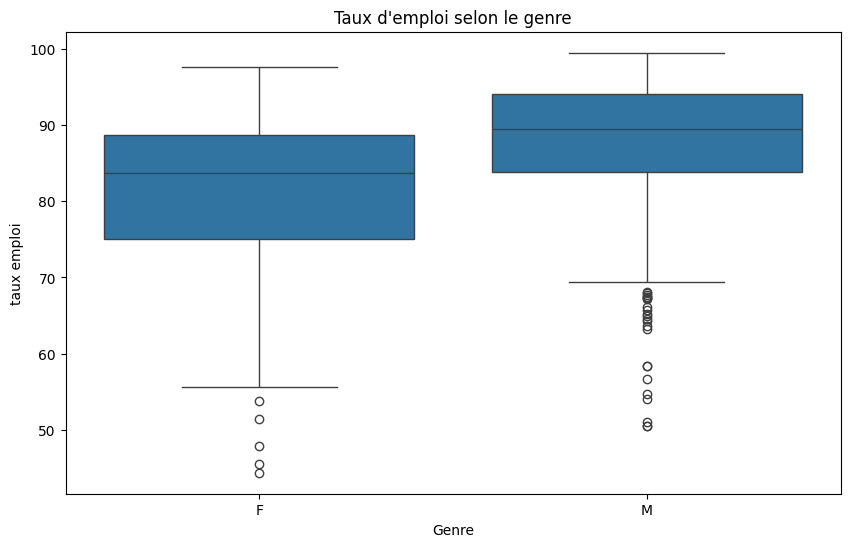

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='taux emploi', data=tauxChomEmploi)
plt.title('Taux d\'emploi selon le genre')
plt.show()

**Interpretation :**

Le taux d'emploi médian semble légèrement plus élevé chez les hommes (M) par rapport aux femmes (F).



*   Les hommes ont aussi une plus grande concentration de valeurs aberrantes en dessous de la moustache inférieure, indiquant qu'il existe des individus masculins avec un taux d'emploi significativement plus bas.
*  La distribution des données pour les femmes est légèrement plus étendue, indiquant une plus grande variabilité dans le taux d'emploi.


En conclusion, bien que le taux d'emploi médian soit similaire ou légèrement plus élevé pour les hommes, les femmes semblent présenter moins de valeurs aberrantes, et leur distribution est un peu plus homogène.

##**Visualisation de distribution de taux de chomage selon le genre**

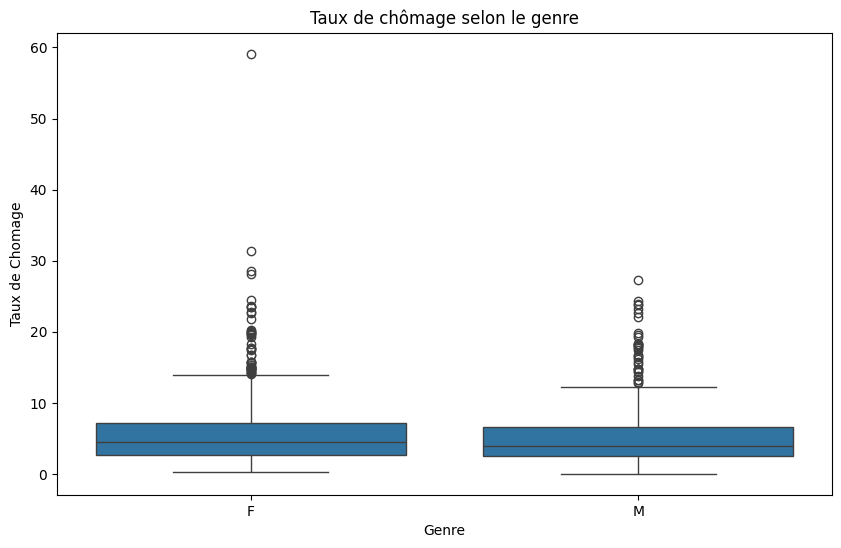

In [ ]:
# Boxplot pour le taux de chômage en fonction du genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Taux de Chomage', data=tauxChomEmploi)
plt.title('Taux de chômage selon le genre')
plt.show()


**Interpretation :**

*   La médiane du taux de chômage est similaire pour les deux genres (F et M), suggérant qu’il n’y a pas de grande différence dans le chômage médian entre hommes et femmes.
*   Les boîtes sont de tailles similaires, indiquant que la variabilité du taux de chômage est comparable entre les genres.


*   Il y a plusieurs valeurs aberrantes pour les deux genres, mais les femmes (F) semblent avoir un point exceptionnellement élevé (environ 60 % de chômage), qui est bien au-dessus des autres valeurs aberrantes.
*   Les moustaches s'étendent légèrement plus haut pour les hommes (M), ce qui indique que le taux de chômage le plus élevé, hors aberrations, est légèrement supérieur chez eux.






##**Visualisation de distribution de taux d'emploi selon le niveau d'étude**

<ipython-input-11-5c1b0fc3b240>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emploi_par_niveau,


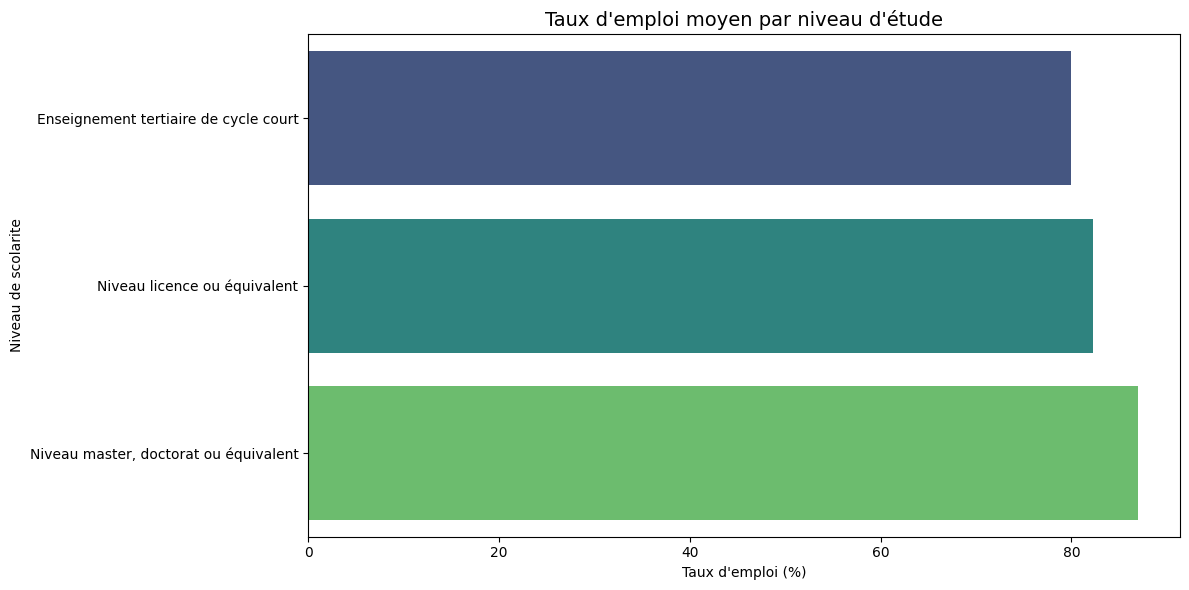

In [ ]:

emploi_par_niveau = (
    tauxChomEmploi.groupby('Niveau de scolarite')['taux emploi']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les données avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(data=emploi_par_niveau,
            x='taux emploi',
            y='Niveau de scolarite',
            palette='viridis')

plt.title("Taux d'emploi moyen par niveau d'étude", fontsize=14)
plt.xlabel("Taux d'emploi (%)")
plt.ylabel("Niveau de scolarite")
plt.tight_layout()
plt.show()




*   Le taux d'emploi moyen augmente avec le niveau d'études.
*   Les personnes ayant un niveau d'études plus élevé (Master, Doctorat ou équivalent) ont le taux d'emploi le plus élevé.


*  
Les personnes avec un niveau licence ont un taux d'emploi légèrement inférieur à celui des niveaux Master/Doctorat, mais supérieur à celui des études tertiaires de cycle court.
*   Élément de liste

Ce graphique montre une corrélation positive entre le niveau d'études et le taux d'emploi moyen. Les individus ayant des qualifications plus élevées (Master, Doctorat) semblent avoir de meilleures opportunités d'emploi,




##**Visualisation de distribution de taux de chomage selon le niveau d'étude**

<ipython-input-14-5e9220a2f7b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chomage_par_niveau,


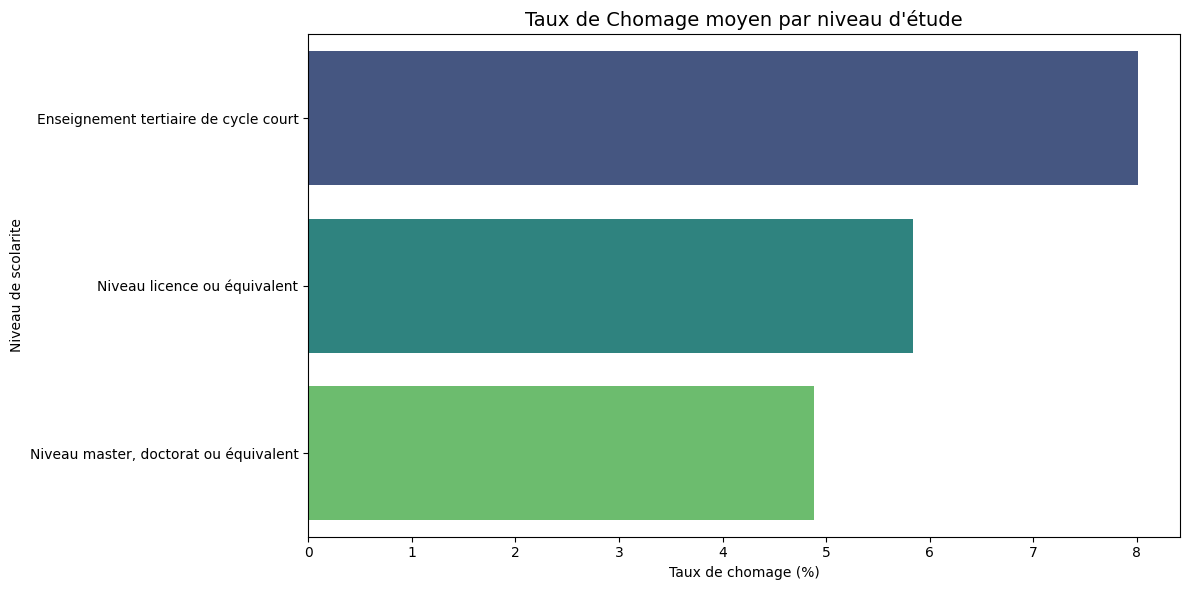

In [ ]:

chomage_par_niveau = (
    tauxChomEmploi.groupby('Niveau de scolarite')['Taux de Chomage']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les données avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(data=chomage_par_niveau,
            x='Taux de Chomage',
            y='Niveau de scolarite',
            palette='viridis')

plt.title("Taux de Chomage moyen par niveau d'étude", fontsize=14)
plt.xlabel("Taux de chomage (%)")
plt.ylabel("Niveau de scolarite")
plt.tight_layout()
plt.show()




*   Les taux de chômage les plus élevés sont observés pour les niveaux d’études
les moins avancés :


  L’enseignement tertiaire de cycle court affiche le taux de chômage le plus élevé.
*   Le chômage diminue à mesure que le niveau d’éducation augmente :

Les individus ayant un niveau licence ou équivalent connaissent un taux de chômage modéré.
Ceux ayant un niveau master, doctorat ou équivalent présentent le taux de chômage le plus faible.

##**Visualisation de distribution de taux d'emploi selon le domaine d'étude**

<ipython-input-13-5e3d5759cb3b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emploi_par_domaine,


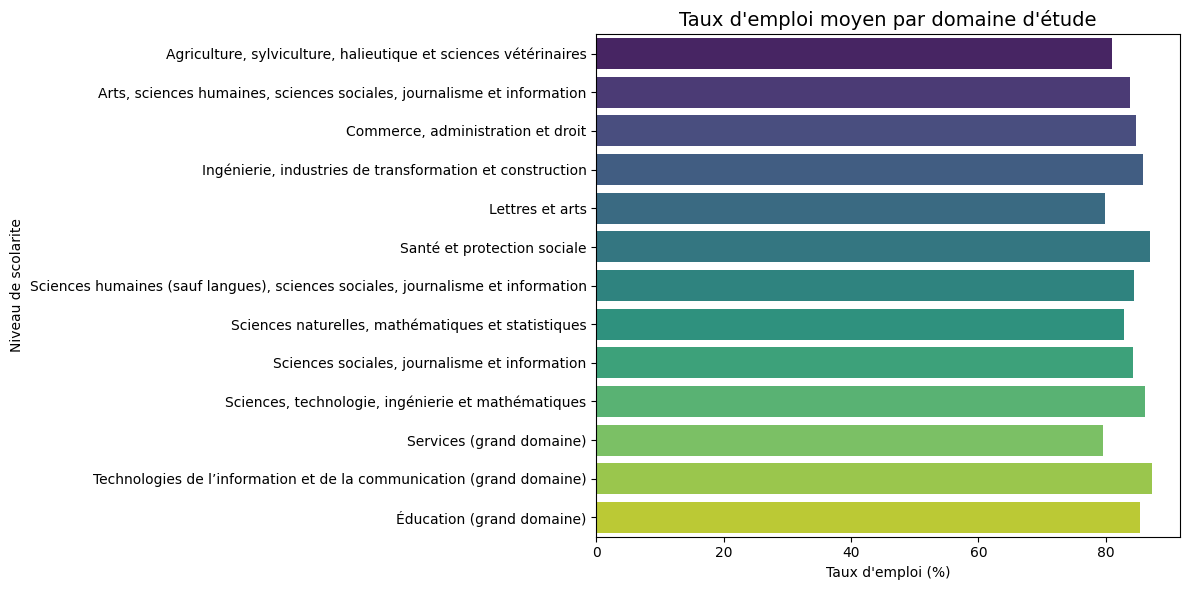

In [ ]:

emploi_par_domaine = (
    tauxChomEmploi.groupby('Domaine etudes')['taux emploi']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les données avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(data=emploi_par_domaine,
            x='taux emploi',
            y='Domaine etudes',
            palette='viridis')

plt.title("Taux d'emploi moyen par domaine d'étude", fontsize=14)
plt.xlabel("Taux d'emploi (%)")
plt.ylabel("Niveau de scolarite")
plt.tight_layout()
plt.show()



1.   Domaines avec les taux d'emploi les plus élevés :


*   Technologies de l’information et de la communication (grand domaine) suit de près, ce qui reflète la forte demande dans ce secteur.
*   Éducation (grand domaine) a le taux d'emploi le plus élevé parmi les domaines représentés.



2.   Domaines avec des taux d'emploi modérés :


*   
Les domaines comme services, sciences, technologie, ingénierie et mathématiques affichent des taux d'emploi compétitifs.
3.  
Domaines avec les taux d'emploi les plus faibles :


*   Les secteurs tels que agriculture, sylviculture, halieutique et sciences vétérinaires et arts, sciences humaines, sciences sociales, journalisme et information ont des taux d'emploi inférieurs comparés aux autres.








##**Visualisation de distribution de taux de chomage selon les pays**

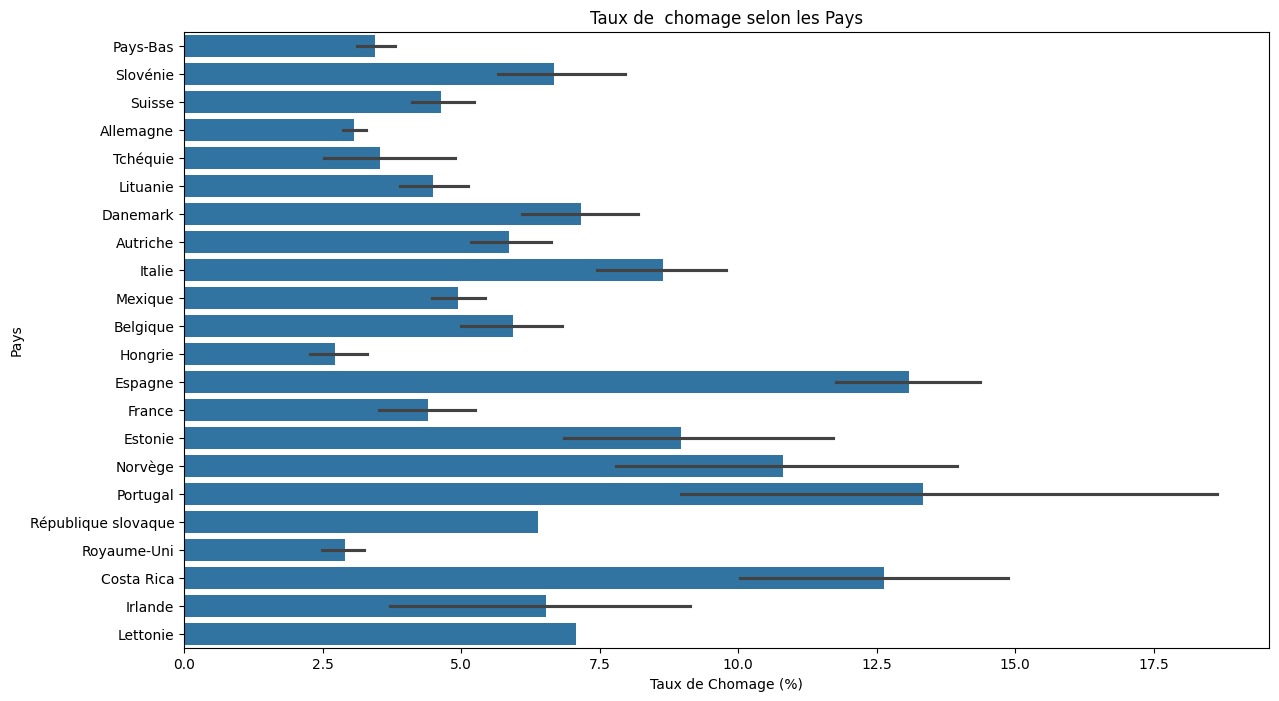

In [ ]:
# Tracer un graphique en barres horizontal pour le taux d'emploi
plt.figure(figsize=(14, 8))
sns.barplot(x='Taux de Chomage', y='Pays', data=tauxChomEmploi)
plt.title('Taux de  chomage selon les Pays')
plt.xlabel('Taux de Chomage (%)')
plt.ylabel('Pays')
plt.show()



1.   Pays avec les taux de chômage les plus bas :


*   Les Pays-Bas, la Suisse, l’Allemagne, et le Royaume-Uni affichent des taux de chômage particulièrement faibles, souvent autour de 2 à 4 %.



2.  Pays avec les taux de chômage les plus élevés :


*   
Des pays comme l’Espagne, le Portugal, et la Lettonie présentent des taux de chômage élevés, parfois supérieurs à 10 %. Cela peut refléter des défis structurels ou économiques dans ces régions.
3.  
Pays intermédiaires :



*   La France, l’Italie, et la Belgique ont des taux de chômage modérés, oscillant autour de 7 à 9 %, ce qui reste significatif mais moins extrême que dans certains pays du sud de l’Europe






##**Visualisation des corrélation entre les variables de cette dataset par la matrice de corrélation**

                         Pays     Genre       Age  Niveau de scolarite  \
Pays                 1.000000 -0.015369  0.021557             0.091023   
Genre               -0.015369  1.000000  0.049411            -0.033581   
Age                  0.021557  0.049411  1.000000             0.028315   
Niveau de scolarite  0.091023 -0.033581  0.028315             1.000000   
Domaine etudes       0.007575  0.002327 -0.030151            -0.031600   
taux emploi          0.023379  0.313438  0.004154             0.267133   
Taux de Chomage     -0.080158 -0.053161 -0.247325            -0.167483   

                     Domaine etudes  taux emploi  Taux de Chomage  
Pays                       0.007575     0.023379        -0.080158  
Genre                      0.002327     0.313438        -0.053161  
Age                       -0.030151     0.004154        -0.247325  
Niveau de scolarite       -0.031600     0.267133        -0.167483  
Domaine etudes             1.000000     0.033864        -0.071727  

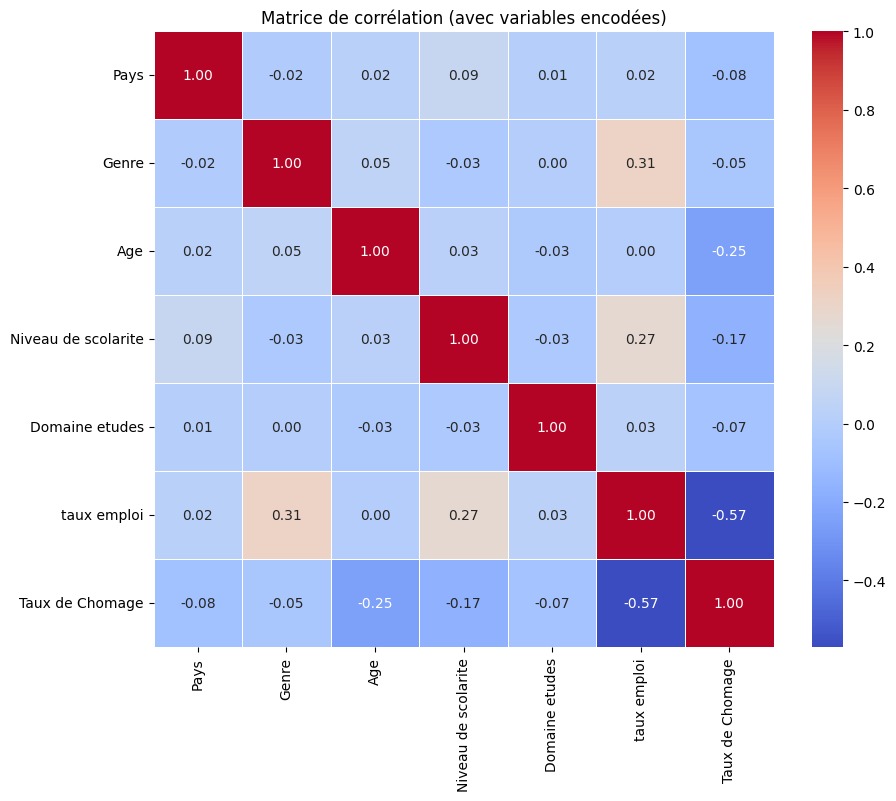

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encodage des variables catégoriques
df_encoded = tauxChomEmploi.copy()
for column in ['Pays', 'Genre', 'Age', 'Niveau de scolarite', 'Domaine etudes']:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

# Calcul de la matrice de corrélation
correlation_matrix = df_encoded.corr()

# Affichage de la matrice de corrélation
print(correlation_matrix)

# Visualisation avec heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation (avec variables encodées)')
plt.show()


1. Corrélation entre taux emploi et Taux de Chomage :

-0.57 (corrélation négative modérée à forte). Plus le taux d'emploi est élevé, plus le taux de chômage tend à être faible (relation intuitive).
Corrélation entre Genre et taux emploi :
2. Corrélation entre Age et Taux de Chomage :
-0.25 (corrélation négative faible). Les personnes plus âgées pourraient avoir un taux de chômage légèrement plus faible.
3. Corrélation entre Niveau de scolarite et taux emploi :

0.27 (corrélation positive faible à modérée). Un niveau d'études plus élevé est associé à un taux d'emploi plus important.
4. Absence de corrélation forte pour certaines variables :

Les corrélations entre Domaine etudes et d'autres variables sont très faibles (autour de 0), ce qui suggère que cette variable pourrait ne pas avoir de relation linéaire directe avec celles analysées ici.

**5-2- datset PIB&Depense :**

In [ ]:
df = pd.read_csv('PIB&Depense.csv')
df.head()

,Pays,PIB,depense,secteur
0,Türkiye,819.865295,8.342024,S13
1,Türkiye,819.865295,55.245168,S1M
2,République slovaque,120.592216,11.438495,S13
3,République slovaque,120.592216,56.512972,S1M
4,Allemagne,4348.297440,50.070965,S1M


In [ ]:
numeric_summary = df[["PIB", "depense"]].describe()
print("\nDescriptive Statistics for Numeric Columns:\n", numeric_summary)


Descriptive Statistics for Numeric Columns:
                 PIB    depense
count     76.000000  76.000000
mean    1594.714885  30.543770
std     3831.634429  23.760757
min       25.825287   3.867823
25%      218.303802   8.068804
50%      517.337251  17.497540
75%     1670.647464  53.008939
max    23594.031000  72.701852


- PIB (Produit Intérieur Brut) :
  - Count : Il y a 76 observations dans le jeu de données.
  - Moyenne (mean) : Le PIB moyen est d'environ 1594,71, ce qui indique la tendance centrale des données.
  - Écart type (std) : Les valeurs du PIB présentent une grande dispersion, avec un écart type d'environ 3831,63, ce qui suggère une variabilité importante des données.
  - Minimum (min) : La valeur la plus basse du PIB est d'environ 25,83.
  - 25e percentile (25%) : 25 % des observations ont un PIB inférieur à 218,30.
  - Médiane (50%) : La médiane du PIB est d'environ 517,34, ce qui signifie que la moitié des observations ont un PIB inférieur à cette valeur.
  - 75e percentile (75%) : 75 % des observations ont un PIB inférieur à 1670,65.
  - Maximum (max) : La valeur maximale du PIB est de 23594,03, bien plus élevée que les autres valeurs, ce qui indique la présence de valeurs extrêmes ou de valeurs aberrantes.
- Dépense (Expenditure) :
  - Count : Il y a également 76 observations pour les dépenses.
  - Moyenne (mean) : La dépense moyenne est d'environ 30,54.
  - Écart type (std) : Les valeurs des dépenses présentent un écart type d'environ 23,76, ce qui indique une variabilité modérée des données.
  - Minimum (min) : La dépense la plus basse est d'environ 3,87.
  - 25e percentile (25%) : 25 % des observations ont une dépense inférieure à 8,07.
  - Médiane (50%) : La médiane des dépenses est d'environ 17,50, ce qui signifie que la moitié des observations ont une dépense inférieure à cette valeur.
  - 75e percentile (75%) : 75 % des observations ont une dépense inférieure à 53,01.
  - Maximum (max) : La dépense maximale est de 72,70, ce qui est considérablement plus élevé que la moyenne, indiquant une limite supérieure potentielle pour les dépenses.


**Distribution des PIB par pays :**


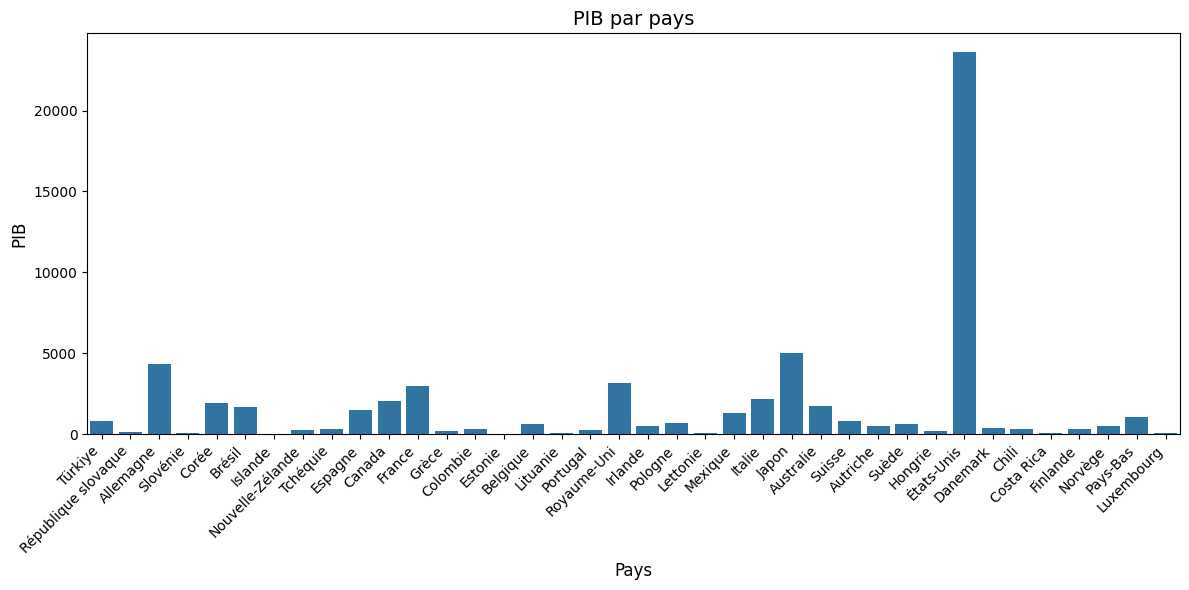

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Pays', y='PIB')
plt.title('PIB par pays', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('PIB', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

**Interprétation du graphique :**
- États-Unis : Ce pays domine largement le graphique avec un PIB extrêmement élevé par rapport aux autres.
- Un PIB élevé reflète souvent une économie dynamique, une forte consommation interne, une grande capacité d'innovation et une forte attractivité pour les investissements étrangers.
- Autres pays : La plupart des pays ont un PIB relativement faible en comparaison avec États-Unis, avec quelques exceptions comme l'Allemagne et le Japon qui se démarquent.
- Déséquilibre : La disparité est significative, et cela peut être lié à la taille de l'économie, la population, ou d'autres facteurs économiques propres à chaque pays.


**Distribution des dépenses par secteur :**




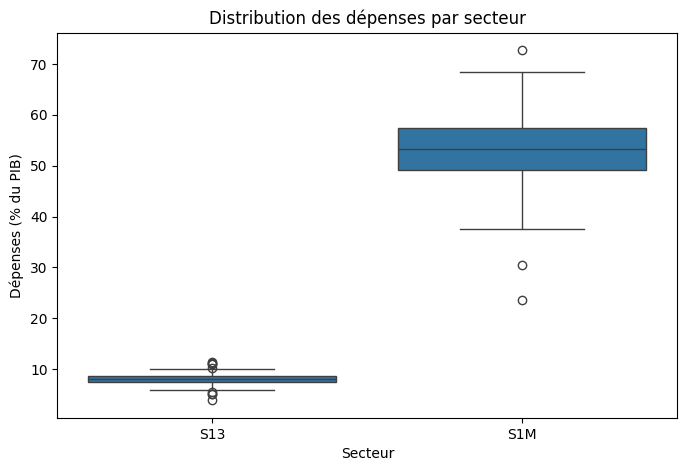

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="secteur", y="depense", data=df)
plt.title("Distribution des dépenses par secteur")
plt.xlabel("Secteur")
plt.ylabel("Dépenses (% du PIB)")
plt.show()


**Interprétation du graphique :**
- Secteur S1M (consommation privée) :

  - La médiane est autour de 50 % du PIB.
  - Grande dispersion avec des valeurs allant de 35 % à 65 %.
  - Des outliers montrent des pays où la consommation privée est exceptionnellement élevée (supérieure à 70 %) ou basse (environ 30 %).
  - Une forte dépendance sur les dépenses privées peut indiquer une moindre intervention de l'État dans l'économie.
  - La grande variabilité montre que certains pays adoptent des politiques de consommation privée très différentes, influencées par leur niveau de développement ou leur modèle économique.
- Secteur S13 (dépenses publiques) :

  - La médiane est autour de 10 % du PIB.
  - Faible dispersion, indiquant une homogénéité dans les dépenses publiques.
  - Quelques outliers reflètent des pays avec des dépenses publiques légèrement atypiques.
  - Les faibles niveaux de dépenses publiques indiquent que de nombreux pays laissent aux ménages la responsabilité de financer des services tels que la santé, l'éducation ...
  - Les écarts réduits reflètent une certaine convergence des pays dans leurs politiques publiques.



**Dépenses par secteur pour chaque pays :**

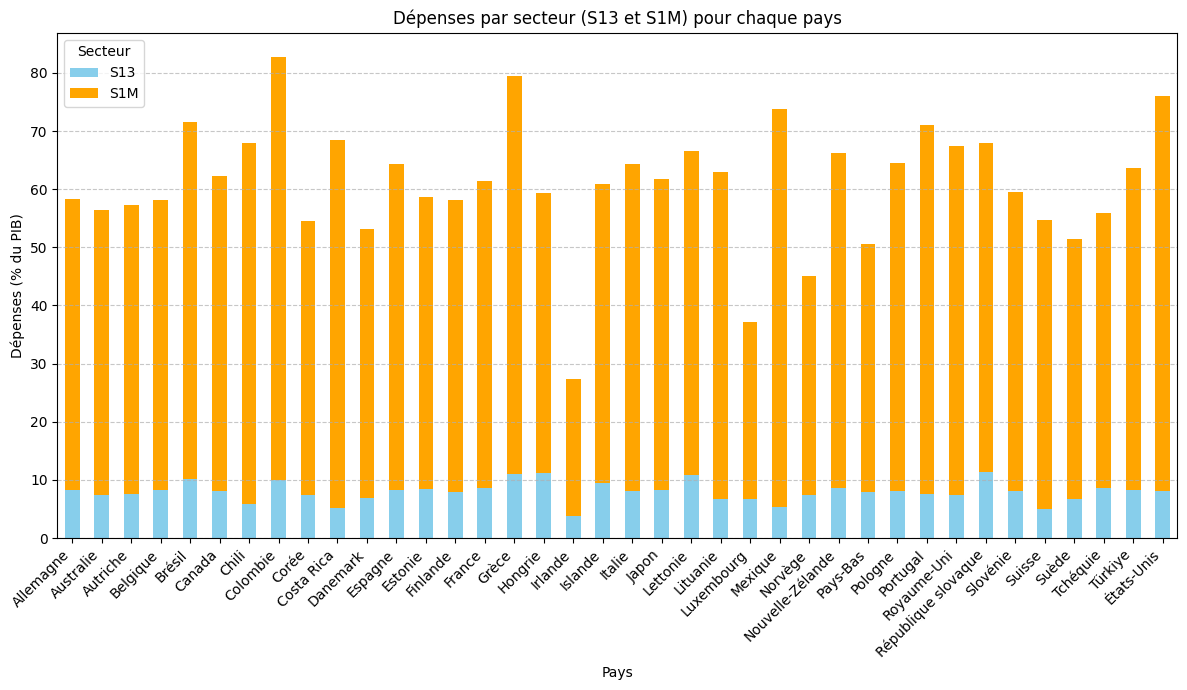

In [ ]:
depenses_par_pays = df.pivot_table(values='depense', index='Pays', columns='secteur', aggfunc='sum')

depenses_par_pays.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'orange'])
plt.title("Dépenses par secteur (S13 et S1M) pour chaque pays")
plt.ylabel("Dépenses (% du PIB)")
plt.xlabel("Pays")
plt.legend(title="Secteur")
plt.xticks(rotation=45,fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Interprétation du graphique :**
- Les dépenses S1M (orange) dominent dans la plupart des pays, atteignant parfois plus de 70 % du PIB .Exemple : États-Unis, Colombie , et Grèce.
- C'est a dire les dépenses privées constituent la majeure partie des dépenses totales.Cela indique une économie axée sur le marché, où les ménages financent directement leurs besoins (santé, éducation, etc.).
- Les dépenses S13 (bleu) restent faibles en comparaison, oscillant généralement autour de 10 % du PIB.
- Si les dépenses publiques relativement plus élevées, cela reflète une forte implication des gouvernements dans la fourniture de services publics(pris en charge par l'État), ce qui garanti l'équité sociale et l'accès universel aux services essentiels.

**Comment les dépenses en pourcentage du PIB influencent-elles le PIB d’un pays (en billions USD) ?**

Pour répondre a cette question on doit appliquer une régression linéaire simple pour modéliser la relation entre les dépenses (% du PIB) et le PIB (en billions USD).

**5-3-la dataset de diffRevenue :**

In [ ]:
diffRevenue = pd.read_csv('/content/drive/MyDrive/diffRe2021.csv')
# description de data
diffRevenue.head()


,Pays,Groupe age,Niveau etude,Proportion des revenus des femmes par rapport aux hommes (%)
0,Danemark,De 45 à 54 ans,Deuxième cycle du secondaire ou post-secondair...,78.976540
1,Canada,De 25 à 34 ans,Deuxième cycle du secondaire ou post-secondair...,73.081802
2,Lettonie,De 55 à 64 ans,"Niveau master, doctorat ou équivalent",82.032822
3,Suisse,De 55 à 64 ans,Enseignement post-secondaire non tertiaire,80.070908
4,Autriche,De 55 à 64 ans,Filière générale du deuxième cycle du secondai...,107.294113


In [ ]:
# Obtenir des informations sur la structure du dataset
diffRevenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Pays                                                          1470 non-null   object 
 1   Groupe age                                                    1470 non-null   object 
 2   Niveau etude                                                  1470 non-null   object 
 3   Proportion des revenus des femmes par rapport aux hommes (%)  1470 non-null   float64
dtypes: float64(1), object(3)
memory usage: 46.1+ KB


In [ ]:
diffRevenue.describe()

,Proportion des revenus des femmes par rapport aux hommes (%)
count,1470.000000
mean,79.528683
std,7.477461
min,51.759571
25%,75.493963
50%,80.070908
75%,83.090586
max,118.847076


<ipython-input-10-85cafe7d6696>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


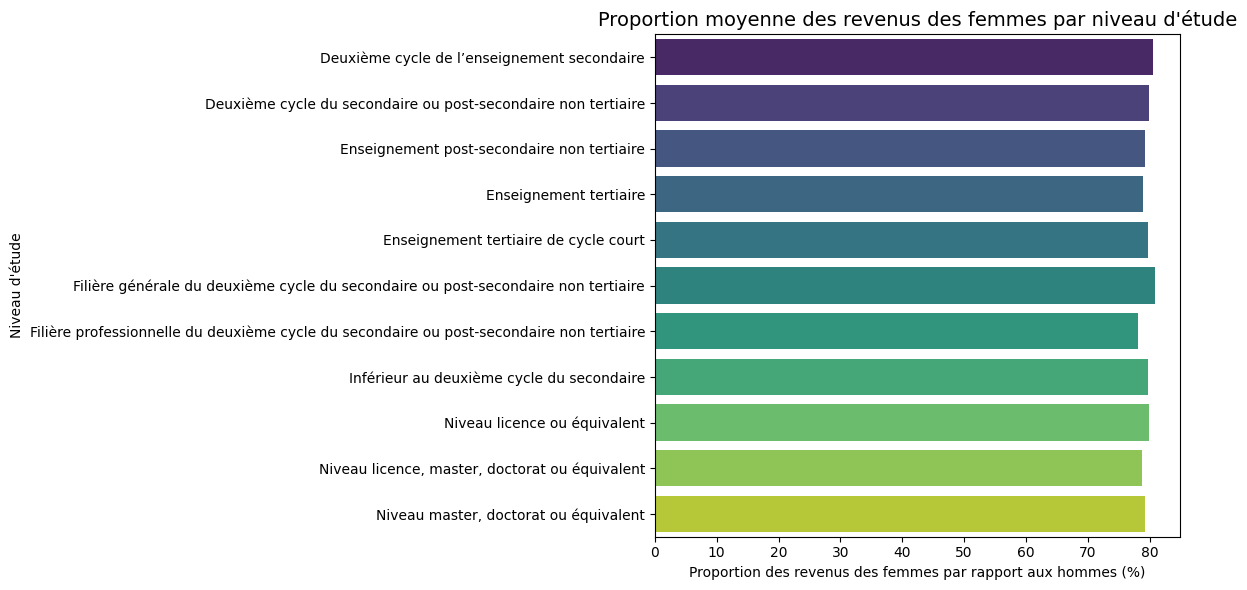

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la moyenne des proportions par niveau d'étude
revenus_par_niveau = (
    diffRevenue.groupby('Niveau etude')['Proportion des revenus des femmes par rapport aux hommes (%)']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les données avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    data=revenus_par_niveau,
    x='Proportion des revenus des femmes par rapport aux hommes (%)',
    y='Niveau etude',
    palette='viridis'
)

# Ajouter des détails au graphique
plt.title("Proportion moyenne des revenus des femmes par niveau d'étude", fontsize=14)
plt.xlabel("Proportion des revenus des femmes par rapport aux hommes (%)")
plt.ylabel("Niveau d'étude")
plt.tight_layout()
plt.show()


<ipython-input-13-8d610237246a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


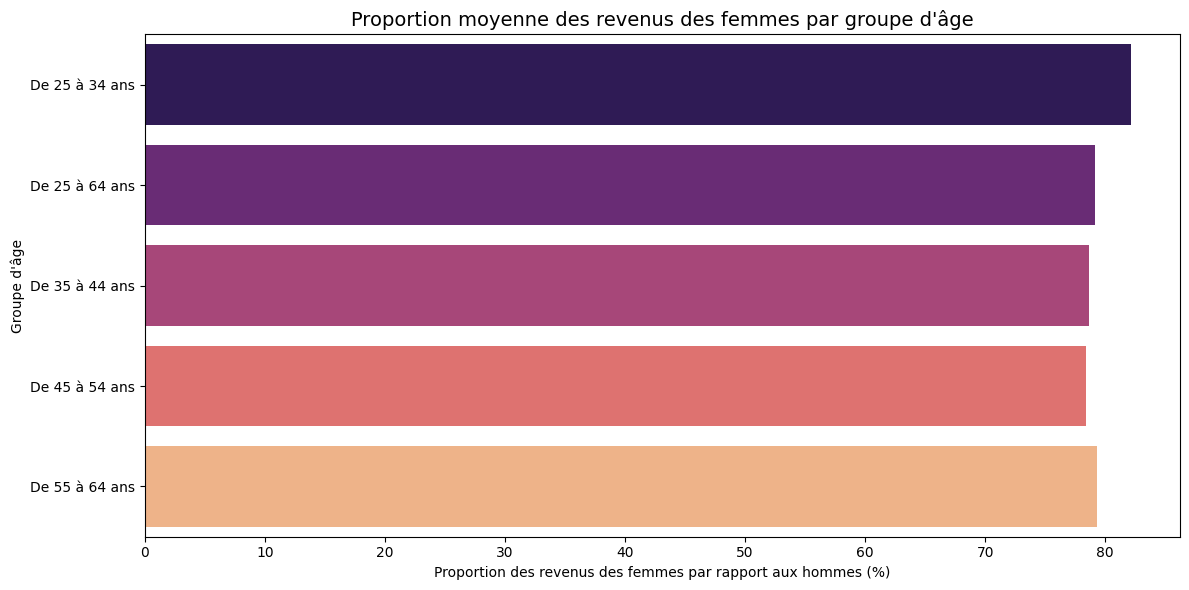

In [ ]:
# Visualisation par "Groupe age"
plot_bar_by_category(
    df=diffRevenue,
    category="Groupe age",
    value="Proportion des revenus des femmes par rapport aux hommes (%)",
    title="Proportion moyenne des revenus des femmes par groupe d'âge",
    xlabel="Proportion des revenus des femmes par rapport aux hommes (%)",
    ylabel="Groupe d'âge",
    palette="magma"
)

<ipython-input-13-8d610237246a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


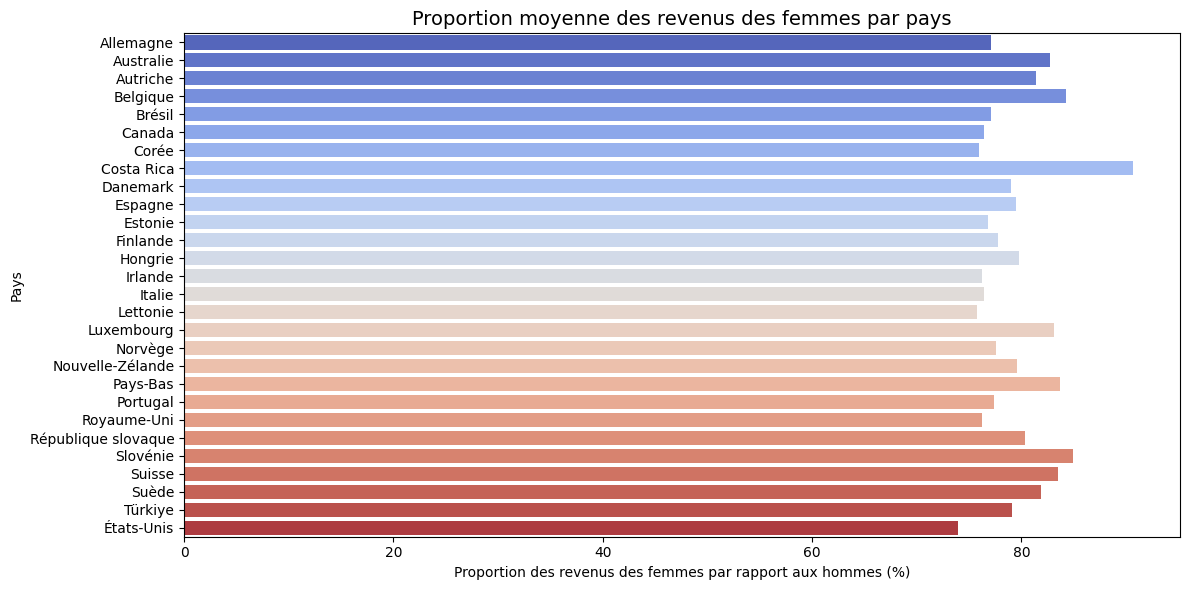

In [ ]:
# Visualisation par "Pays"
plot_bar_by_category(
    df=diffRevenue,
    category="Pays",
    value="Proportion des revenus des femmes par rapport aux hommes (%)",
    title="Proportion moyenne des revenus des femmes par pays",
    xlabel="Proportion des revenus des femmes par rapport aux hommes (%)",
    ylabel="Pays",
    palette="coolwarm"
)



#**3- Analyse de Données :**

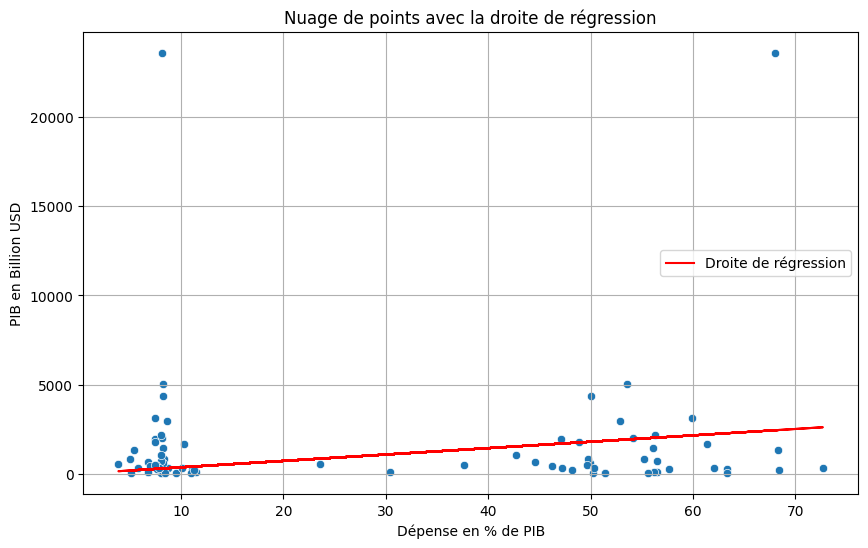

In [ ]:
X = df[['depense']]
y = df['PIB']
model = sm.OLS(y, X).fit()
# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depense', y='PIB', data=df)
plt.plot(df['depense'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de régression')
plt.xlabel('Dépense en % de PIB')
plt.ylabel('PIB en Billion USD')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

La droite de régression montre une tendance légèrement croissante, indiquant une relation positive entre les dépenses et le PIB.C.est a dire une augmentation des dépenses en % du PIB est associée à une augmentation moyenne du PIB.
- Concentration des points dans des zones spécifiques (elle reflète des groupes de pays ayant des profils économiques similaires) :

   - Zone à faible dépense (0-15 %) et faible PIB : La majorité des pays ont des dépenses en pourcentage du PIB relativement faibles, associées à un PIB également faible. Cela peut indiquer que ces pays partagent des caractéristiques communes, comme des économies émergentes ou de petite taille.
   - Zone avec des valeurs extrêmes (outliers) : Quelques élements se situent loin de cette concentration, avec un PIB très élevé malgré une dépense relativement moyenne. Ces points représentent des économies exceptionnelles qui ne suivent pas la tendance générale.
- Dispersion des points :

   - La dispersion reflète la variabilité dans la relation entre les dépenses et le PIB.
   - Cette dispersion indique que d'autres facteurs influencent le PIB, ce qui limite la capacité des dépenses seules à prédire le PIB.


**Résumé du modèle :**

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PIB   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.101
Method:                 Least Squares   F-statistic:                              9.494
Date:                Mon, 23 Dec 2024   Prob (F-statistic):                     0.00288
Time:                        23:38:20   Log-Likelihood:                         -736.03
No. Observations:                  76   AIC:                                      1474.
Df Residuals:                      75   BIC:                                      1476.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Intreprétations :**
- R-squared (R²) =  0.112 : Cela indique que 11.2% de la variance de la variable dépendante (PIB) est expliquée par les dépenses . Cela suggère que le modèle ne parvient pas à bien expliquer la variation du PIB en fonction des dépenses, ce qui peut indiquer que d'autres facteurs non pris en compte pourraient être responsables de la variation du PIB.
- depense (coefficient) = 35.8364 : ce qui montre que depense a un effet posotive sur le PIB, dont chaque augmentation d'une unité de dépense en pourcentage du PIB est associée à une augmentation de 35.8364 dans le PIB (en billions USD).

**Tests de régression :** pour évaluer la qualité du modèle de régression

**Test de Durbin-Watson (DW) :** pour mesurer l'autocorrélation des résidus du modèle de régression :

In [ ]:
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')

Test de Durbin-Watson: 1.1627120469427652


- DW = 1.162 indique une autocorrélation positive modérée dans les résidus. Cela signifie que les erreurs dans le modèle sont corrélées dans une certaine mesure.Ce qui  pourrait suggérer qu'il existe une relation entre les observations.

**Test de White :** pour vérifier la présence d'hétéroscédasticité(si la variance des résidus est constante à travers les observations )

In [ ]:
X_with_const = sm.add_constant(model.model.exog)

new_model = sm.OLS(model.model.endog, X_with_const).fit()

white_test = het_white(new_model.resid, new_model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))


{'LM statistic': 3.5399213834969983, 'p-value': 0.17033968444896883, 'f-statistic': 1.7831491900729628, 'f p-value': 0.17535175397488675}


- p-value vaut 0.17 > 0.05 suggère que nous n'avons pas de preuves suffisantes pour rejeter l'hypothèse nulle. En d'autres termes, la variance des résidus semble être constante.
- Cela peut indiquer que la relation entre ces deux variables semble stable, peu importe le niveau de PIB.

**Test de normalité de Shapiro-Wilk :** utilisé pour vérifier si les résidus suivent une distribution normale.

In [ ]:
shapiro_test = stats.shapiro(model.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.47090263225126716, pvalue=4.362107488354104e-15)


-  p-value ≈ 4.36e-15, inférieur a 0.05, ce qui indique que les résidus ne suivent pas une distribution normale.
- Cela peut indiquer que la relation entre les dépenses en pourcentage du PIB et le PIB en billions USD n'est peut-être pas parfaitement linéaire, ou qu'il existe des facteurs non pris en compte dans le modèle qui influencent cette relation.

##**Dans quelle mesure le taux de chômage impacte-t-il le taux d'emploi ?**



##On répond en appliquant la régression linéaire :

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Charger les données
tauxChomEmploi = pd.read_csv('/content/drive/MyDrive/tauxChomEmploi2.csv')
# description de data
tauxChomEmploi.head()


,Pays,Genre,Age,Niveau de scolarite,Domaine etudes,taux emploi,Taux de Chomage
0,Pays-Bas,F,De 45 à 54 ans,Niveau licence ou équivalent,"Sciences, technologie, ingénierie et mathémati...",81.568626,2.347418
1,Slovénie,M,De 35 à 44 ans,"Niveau master, doctorat ou équivalent",Éducation (grand domaine),91.121391,7.145464
2,Suisse,F,De 35 à 44 ans,Niveau licence ou équivalent,Lettres et arts,72.585220,15.116038
3,Allemagne,M,De 45 à 54 ans,"Niveau master, doctorat ou équivalent","Sciences humaines (sauf langues), sciences soc...",92.181023,3.538925
4,Suisse,M,De 25 à 34 ans,"Niveau master, doctorat ou équivalent","Ingénierie, industries de transformation et co...",95.193298,3.940461


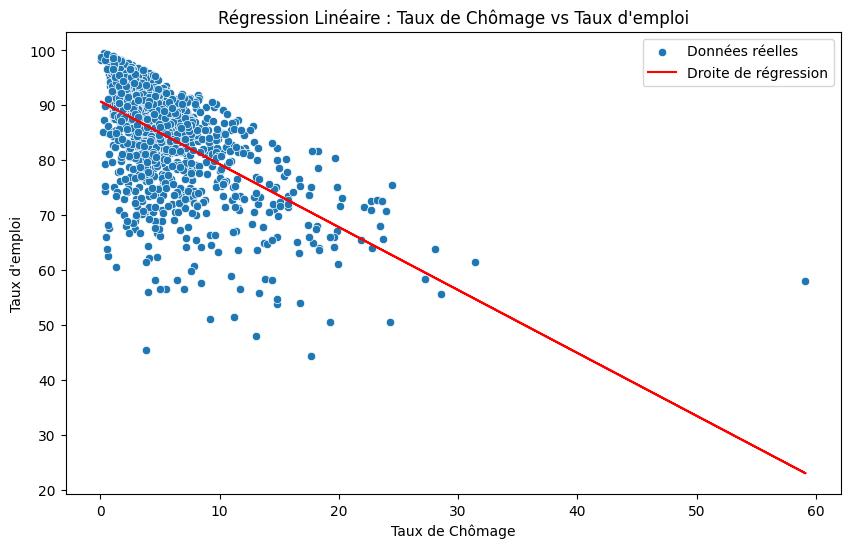

Coefficient de régression (pente) : -1.1459794550043112
Ordonnée à l'origine : 90.7302564292137
Score R^2 : 0.32586443443023394


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



# Sélectionner les variables
X = tauxChomEmploi[['Taux de Chomage']]  # Variable indépendante
y = tauxChomEmploi['taux emploi']       # Variable dépendante

# Créer une instance du modèle de régression linéaire
reg_model = LinearRegression()

# Entraîner le modèle
reg_model.fit(X, y)

# Prédire les valeurs de y basées sur le modèle
y_pred = reg_model.predict(X)

# Tracer le nuage de points et la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Taux de Chomage'], y=y, label='Données réelles')
plt.plot(X['Taux de Chomage'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Régression Linéaire : Taux de Chômage vs Taux d\'emploi')
plt.xlabel('Taux de Chômage')
plt.ylabel('Taux d\'emploi')
plt.legend()

# Afficher le graphique
plt.show()

# Afficher les coefficients du modèle
print(f"Coefficient de régression (pente) : {reg_model.coef_[0]}")
print(f"Ordonnée à l'origine : {reg_model.intercept_}")
print(f"Score R^2 : {r2_score(y, y_pred)}")


* Corrélation négative:

La pente de la droite est négative, indiquant qu'il existe une relation inverse entre le taux de chômage et le taux d'emploi. En d'autres termes, plus le taux de chômage est élevé, plus le taux d'emploi est faible.
Alignement des points :

* Les points sont globalement alignés le long de la droite de régression, ce qui suggère que la régression linéaire est un modèle raisonnable pour décrire cette relation. Cependant, il y a une certaine dispersion autour de la droite.

* Le
𝑅
  indique la proportion de la variance dans la variable dépendante (taux d'emploi) expliquée par la variable indépendante (taux de chômage).

* Un
𝑅
carré
  de 0.326 (ou 32.6 %) signifie que seulement environ 32.6 % de la variabilité du taux d'emploi est expliquée par le taux de chômage.
Ce score est relativement faible, ce qui suggère que d'autres facteurs non inclus dans le modèle influencent le taux d'emploi.



##**Comment la dispersion des taux de chômage diffère-t-elle entre les différents niveaux d'études ?**

##On répond en appliquant **ANOVA** :

ANOVA : Impact des niveau d'études sur le taux de chômage
                              sum_sq      df          F        PR(>F)
C(Niveau_de_scolarite)    816.292999     2.0  18.341049  1.439268e-08
Residual                25769.171549  1158.0        NaN           NaN


<ipython-input-6-463cd1027932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Niveau_de_scolarite', y='Taux_de_Chomage', palette='coolwarm')


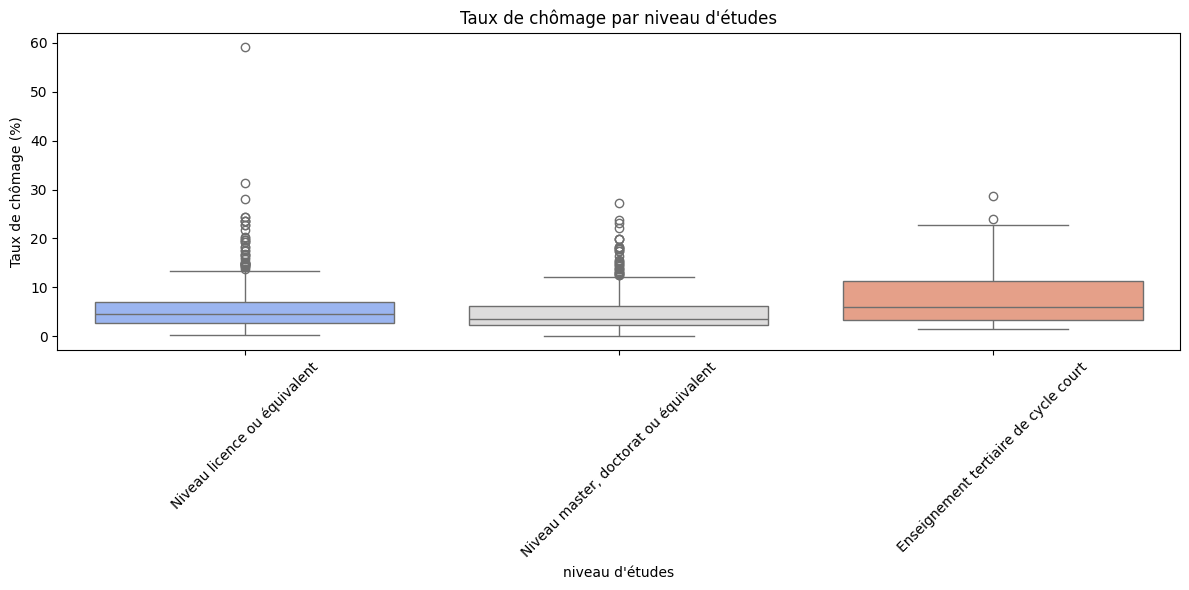

In [6]:
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
# Renommer les colonnes pour supprimer les espaces
df = tauxChomEmploi.rename(columns={
    'Taux de Chomage': 'Taux_de_Chomage',
    'Niveau de scolarite': 'Niveau_de_scolarite'
})

# ANOVA après renommage des colonnes
model = ols('Taux_de_Chomage ~ C(Niveau_de_scolarite)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats
print("ANOVA : Impact des niveau d'études sur le taux de chômage")
print(anova_table)

# Visualisation des données
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Niveau_de_scolarite', y='Taux_de_Chomage', palette='coolwarm')
plt.title("Taux de chômage par niveau d'études")
plt.xlabel("niveau d'études")
plt.ylabel("Taux de chômage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretation :**

* Comparaison entre les domaines :

* Niveau licence ou équivalent : La médiane est relativement basse, mais il y a plusieurs outliers avec des taux de chômage très élevés, dépassant parfois 50 %.
* Niveau master, doctorat ou équivalent : La médiane est légèrement inférieure, et il semble que les taux de chômage soient globalement concentrés autour de valeurs faibles (moins d'outliers).
* Enseignement tertiaire de cycle court : La distribution est similaire à celle du niveau licence, mais il y a moins de valeurs extrêmes.

* sum_sq : La somme des carrés pour le facteur Niveau_de_scolarite est de 816.29, ce qui montre l'importance de ce facteur dans l'explication de la variabilité du taux de chômage.
* df : Les degrés de liberté pour cette variable sont de 2, ce qui signifie qu'il y a trois catégories de niveaux d'études dans votre modèle.
* F : La valeur F de 18.34 indique que la variation entre les groupes (niveaux d'études) est beaucoup plus grande que la variation résiduelle, ce qui confirme une forte relation entre le niveau d'études et le taux de chômage.
* PR(>F) : La valeur p est de 1.44e-08, ce qui est très significatif et signifie que vous pouvez rejeter l'hypothèse nulle (qui suggère qu'il n'y a pas d'effet du niveau d'études sur le taux de chômage).

* Conclusion générale :

Les niveaux supérieurs d'études (comme master ou doctorat) semblent être associés à des taux de chômage plus faibles et moins de dispersion. Les niveaux de cycle court ou équivalents montrent une plus grande variation et des risques plus élevés de chômage dans certains cas.

##**Y a-t-il une forte variabilité du taux d'emploi selon les domaines d'études ?**

##**en appliquant ANOVA on repond :**

ANOVA : Impact des domaines d'études sur le taux d'emploi
                          sum_sq      df         F        PR(>F)
C(Domaine_etudes)    4757.173819    12.0  4.445011  5.343476e-07
Residual           102385.123387  1148.0       NaN           NaN


<ipython-input-11-7b3f07f528a0>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordre_domaine = df.groupby('Domaine_etudes')['taux_emploi'].median().sort_values().index
<ipython-input-11-7b3f07f528a0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Domaine_etudes', y='taux_emploi', palette='coolwarm')


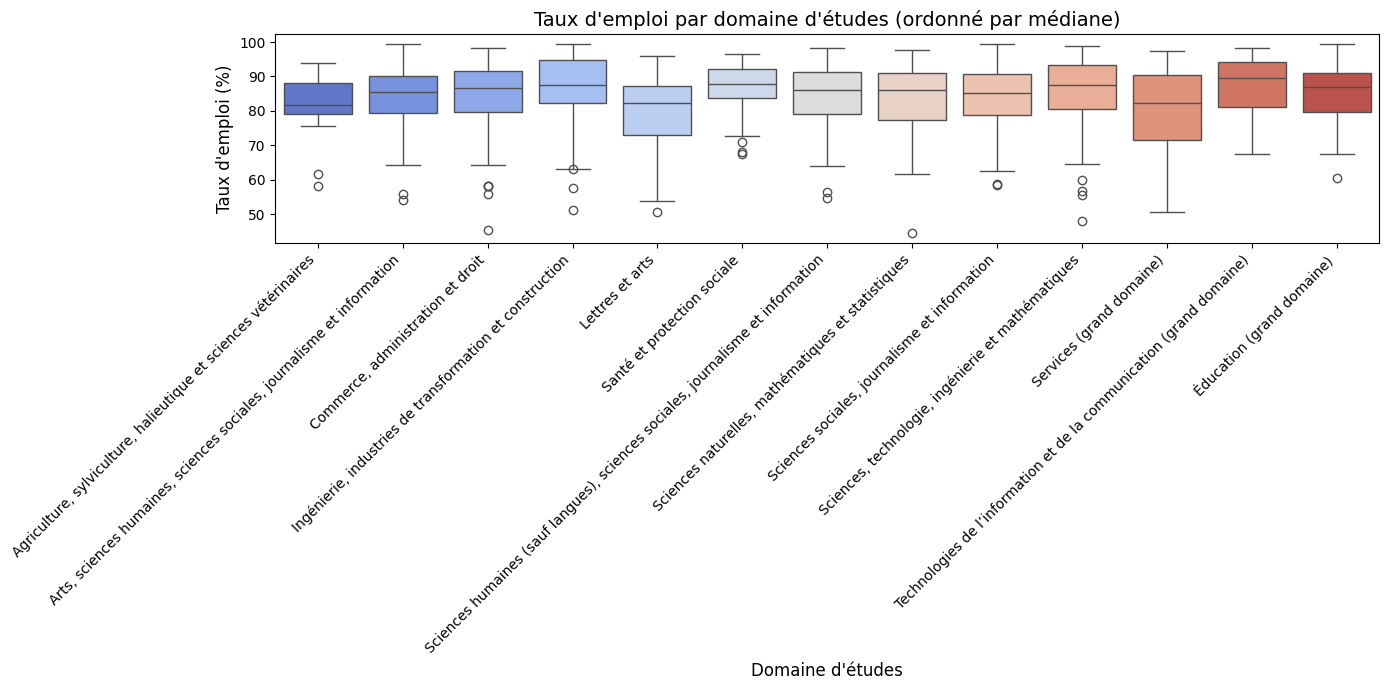

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Renommer les colonnes pour supprimer les espaces
df = tauxChomEmploi.rename(columns={
    'taux emploi': 'taux_emploi',
    'Domaine etudes': 'Domaine_etudes'
})

# ANOVA après renommage des colonnes
model = ols('taux_emploi ~ C(Domaine_etudes)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les résultats de l'ANOVA
print("ANOVA : Impact des domaines d'études sur le taux d'emploi")
print(anova_table)

# Ajouter une colonne pour ordonner les domaines d'études par médiane
df['Domaine_etudes'] = df['Domaine_etudes'].astype('category')
ordre_domaine = df.groupby('Domaine_etudes')['taux_emploi'].median().sort_values().index
df['Domaine_etudes'] = df['Domaine_etudes'].cat.reorder_categories(ordre_domaine, ordered=True)

# Visualisation améliorée des données
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Domaine_etudes', y='taux_emploi', palette='coolwarm')

# Ajouter des titres et ajustements
plt.title("Taux d'emploi par domaine d'études (ordonné par médiane)", fontsize=14)
plt.xlabel("Domaine d'études", fontsize=12)
plt.ylabel("Taux d'emploi (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()




*   F-statistic (F) : 4.445  Une statistique F élevée indique que les différences entre les groupes sont probablement significatives.
* p-value (PR(>F)) : 5.34×10−75.34×10 −7
   Cette valeur extrêmement faible (< 0.05) indique qu'il y a une différence significative entre les domaines d'études.

* Conclusion générale :
Le graphique montre que les domaines d'études influencent significativement le taux d'emploi, en ligne avec les résultats de l'ANOVA.
Les domaines techniques et liés aux TIC (technologies de l'information) offrent généralement de meilleures opportunités, tandis que les filières artistiques et sociales présentent des défis plus importants pour l'intégration sur le marché du travail.


